# Chương 13: Học máy không giám sát
<hr>

Họ giải thuật học máy thứ hai mà chúng ta sẽ thảo luận là các giải thuật học không giám sát.  Học không giám sát bao gồm tất cả các loại học máy mà không có đầu ra đã biết, không có "người thầy" để hướng dẫn giải thuật học.  Trong học không giám sát, giải thuật học chỉ được cung cấp dữ liệu đầu vào và được yêu cầu trích xuất kiến thức từ dữ liệu này. 

### Các loại Học không giám sát

Chúng ta sẽ xem xét hai loại học không giám sát trong chương này: các phép biến đổi của tập dữ liệu và phân cụm. 

Các phép biến đổi không giám sát của một tập dữ liệu là các giải thuật tạo ra một biểu diễn mới của dữ liệu có thể dễ hiểu hơn cho con người hoặc các giải thuật học máy khác so với biểu diễn ban đầu của dữ liệu.  Một ứng dụng phổ biến của các phép biến đổi không giám sát là giảm chiều dữ liệu, nhận một biểu diễn chiều cao của dữ liệu, bao gồm nhiều đặc trưng, và tìm một cách mới để biểu diễn dữ liệu này mà tóm tắt các đặc tính thiết yếu với ít đặc trưng hơn.  Một ứng dụng phổ biến của giảm chiều dữ liệu là giảm xuống hai chiều cho mục đích trực quan hóa. 

Một ứng dụng khác cho các phép biến đổi không giám sát là tìm ra các phần hoặc thành phần "tạo nên" dữ liệu.  Một ví dụ về điều này là trích xuất chủ đề trên các bộ sưu tập tài liệu văn bản.  Ở đây, nhiệm vụ là tìm các chủ đề chưa biết được nói đến trong mỗi tài liệu, và tìm hiểu những chủ đề nào xuất hiện trong mỗi tài liệu.  Điều này có thể hữu ích để theo dõi các cuộc thảo luận về các chủ đề như bầu cử, kiểm soát súng, hoặc các ngôi sao nhạc pop trên mạng xã hội. 

Mặt khác, các giải thuật phân cụm, phân chia dữ liệu thành các nhóm riêng biệt gồm các mục tương tự.  Hãy xem xét ví dụ về việc tải ảnh lên một trang mạng xã hội.  Để cho phép bạn tổ chức ảnh của mình, trang web có thể muốn nhóm các bức ảnh có cùng một người lại với nhau.  Tuy nhiên, trang web không biết bức ảnh nào có ai, và nó không biết có bao nhiêu người khác nhau xuất hiện trong bộ sưu tập ảnh của bạn.  Một phương pháp hợp lý là trích xuất tất cả các khuôn mặt và chia chúng thành các nhóm khuôn mặt trông giống nhau.  Hy vọng rằng, những nhóm này tương ứng với cùng một người, và các hình ảnh có thể được nhóm lại với nhau cho bạn. 

### Những thách thức trong Học không giám sát

Một thách thức lớn trong học không giám sát là đánh giá xem giải thuật có học được điều gì hữu ích hay không.  Các giải thuật học không giám sát thường được áp dụng cho dữ liệu không chứa bất kỳ thông tin nhãn nào, vì vậy chúng ta không biết đầu ra đúng phải là gì.  Do đó, rất khó để nói liệu một mô hình có "làm tốt" hay không.  Ví dụ, giải thuật phân cụm giả định của chúng ta có thể đã nhóm tất cả các bức ảnh chụp khuôn mặt nhìn nghiêng và tất cả các bức ảnh chụp toàn mặt lại với nhau.  Đây chắc chắn sẽ là một cách khả thi để phân chia một bộ sưu tập ảnh chụp khuôn mặt người, nhưng đó không phải là cách chúng ta đang tìm kiếm.  Tuy nhiên, không có cách nào để chúng ta "chỉ" cho giải thuật biết chúng ta đang tìm kiếm điều gì, và thường cách duy nhất để đánh giá kết quả của một giải thuật không giám sát là kiểm tra thủ công. 

Do đó, các giải thuật không giám sát thường được sử dụng trong một môi trường khám phá, khi một nhà khoa học dữ liệu muốn hiểu rõ hơn về dữ liệu, thay vì là một phần của một hệ thống tự động lớn hơn.  Một ứng dụng phổ biến khác cho các giải thuật không giám sát là làm một bước tiền xử lý cho các giải thuật có giám sát.  Học một biểu diễn mới của dữ liệu đôi khi có thể cải thiện độ chính xác của các giải thuật có giám sát, hoặc có thể dẫn đến giảm mức tiêu thụ bộ nhớ và thời gian. 

Trước khi chúng ta bắt đầu với các giải thuật không giám sát "thực sự", chúng ta sẽ thảo luận ngắn gọn về một số phương pháp tiền xử lý đơn giản thường hữu ích.  Mặc dù tiền xử lý và co giãn dữ liệu thường được sử dụng cùng với các giải thuật học có giám sát, các phương pháp co giãn không sử dụng thông tin có giám sát, khiến chúng trở thành không giám sát. 

## Tiền xử lý và Co giãn dữ liệu

Trong chương trước, chúng ta đã thấy rằng một số giải thuật, như mạng nơ-ron và SVM, rất nhạy cảm với việc co giãn dữ liệu.  Do đó, một thực hành phổ biến là điều chỉnh các đặc trưng sao cho biểu diễn dữ liệu phù hợp hơn với các giải thuật này.  Thường thì, đây là một phép co giãn và dịch chuyển đơn giản trên từng đặc trưng của dữ liệu.  Đoạn mã sau (Hình 3-1) cho thấy một ví dụ đơn giản: 

In [1]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_scaling()

ModuleNotFoundError: No module named 'mglearn'

**Hình 3-1. Các cách khác nhau để co giãn và tiền xử lý một tập dữ liệu** 

### Các loại Tiền xử lý khác nhau

Biểu đồ đầu tiên trong Hình 3-1 cho thấy một tập dữ liệu phân loại hai lớp tổng hợp với hai đặc trưng.  Đặc trưng thứ nhất (giá trị trục x) nằm trong khoảng từ 10 đến 15.  Đặc trưng thứ hai (giá trị trục y) nằm trong khoảng từ 1 đến 9. 

Bốn biểu đồ sau cho thấy bốn cách khác nhau để biến đổi dữ liệu nhằm tạo ra các phạm vi tiêu chuẩn hơn.  `StandardScaler` trong scikit-learn đảm bảo rằng đối với mỗi đặc trưng, trung bình là 0 và phương sai là 1, đưa tất cả các đặc trưng về cùng một độ lớn.  Tuy nhiên, phép co giãn này không đảm bảo bất kỳ giá trị tối thiểu và tối đa cụ thể nào cho các đặc trưng.  `RobustScaler` hoạt động tương tự như `StandardScaler` ở chỗ nó đảm bảo các thuộc tính thống kê cho mỗi đặc trưng để chúng ở trên cùng một thang đo.  Tuy nhiên, `RobustScaler` sử dụng trung vị và tứ phân vị¹, thay vì trung bình và phương sai.  Điều này làm cho `RobustScaler` bỏ qua các điểm dữ liệu rất khác biệt so với phần còn lại (như lỗi đo lường).  Những điểm dữ liệu kỳ lạ này còn được gọi là các điểm ngoại lai, và có thể gây ra rắc rối cho các kỹ thuật co giãn khác. 

`MinMaxScaler`, mặt khác, dịch chuyển dữ liệu sao cho tất cả các đặc trưng đều nằm chính xác trong khoảng từ 0 đến 1.  Đối với tập dữ liệu hai chiều, điều này có nghĩa là tất cả dữ liệu được chứa trong hình chữ nhật được tạo bởi trục x từ 0 đến 1 và trục y từ 0 đến 1. 

Cuối cùng, `Normalizer` thực hiện một loại co giãn rất khác.  Nó co giãn mỗi điểm dữ liệu sao cho vectơ đặc trưng có độ dài Euclid là 1.  Nói cách khác, nó chiếu một điểm dữ liệu lên vòng tròn (hoặc hình cầu, trong trường hợp nhiều chiều hơn) với bán kính là 1.  Điều này có nghĩa là mỗi điểm dữ liệu được co giãn bởi một số khác nhau (bằng nghịch đảo của độ dài của nó).  Phép chuẩn hóa này thường được sử dụng khi chỉ có hướng (hoặc góc) của dữ liệu là quan trọng, chứ không phải độ dài của vectơ đặc trưng. 

---
¹ Trung vị của một tập hợp các số là số x sao cho một nửa số các số nhỏ hơn x và một nửa số các số lớn hơn x.  Tứ phân vị dưới là số x sao cho một phần tư số các số nhỏ hơn x, và tứ phân vị trên là số x sao cho một phần tư số các số lớn hơn x. 

### Áp dụng các Phép biến đổi Dữ liệu

Bây giờ chúng ta đã thấy các loại biến đổi khác nhau làm gì, hãy áp dụng chúng bằng scikit-learn.  Chúng ta sẽ sử dụng tập dữ liệu ung thư mà chúng ta đã thấy trong Chương 2.  Các phương pháp tiền xử lý như các scaler thường được áp dụng trước khi áp dụng một giải thuật học máy có giám sát.  Ví dụ, giả sử chúng ta muốn áp dụng kernel SVM (`SVC`) cho tập dữ liệu ung thư, và sử dụng `MinMaxScaler` để tiền xử lý dữ liệu.  Chúng ta bắt đầu bằng cách tải tập dữ liệu và chia nó thành một tập huấn luyện và một tập kiểm tra (chúng ta cần các tập huấn luyện và kiểm tra riêng biệt để đánh giá mô hình có giám sát mà chúng ta sẽ xây dựng sau khi tiền xử lý): 

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


Để nhắc lại, tập dữ liệu chứa 569 điểm dữ liệu, mỗi điểm được biểu diễn bởi 30 phép đo.  Chúng ta đã chia tập dữ liệu thành 426 mẫu cho tập huấn luyện và 143 mẫu cho tập kiểm tra. 

Giống như các mô hình có giám sát mà chúng ta đã xây dựng trước đó, trước tiên chúng ta nhập lớp triển khai tiền xử lý, sau đó khởi tạo nó: 

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Sau đó, chúng ta khớp scaler bằng phương thức `fit`, áp dụng trên dữ liệu huấn luyện.  Đối với `MinMaxScaler`, phương thức `fit` tính toán giá trị tối thiểu và tối đa của mỗi đặc trưng trên tập huấn luyện.  Trái ngược với các bộ phân loại và hồi quy của Chương 2, scaler chỉ được cung cấp dữ liệu (`X_train`) khi `fit` được gọi, và `y_train` không được sử dụng: 

In [13]:
scaler.fit(X_train)

MinMaxScaler()

Để áp dụng phép biến đổi mà chúng ta vừa học—tức là, để thực sự co giãn dữ liệu huấn luyện—chúng ta sử dụng phương thức `transform` của scaler.  Phương thức `transform` được sử dụng trong scikit-learn bất cứ khi nào một mô hình trả về một biểu diễn mới của dữ liệu: 

In [14]:
import numpy as np

# biến đổi dữ liệu
X_train_scaled = scaler.transform(X_train)
# in các thuộc tính của tập dữ liệu trước và sau khi co giãn
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Dữ liệu đã biến đổi có cùng hình dạng với dữ liệu gốc—các đặc trưng chỉ đơn giản là được dịch chuyển và co giãn.  Bạn có thể thấy rằng tất cả các đặc trưng bây giờ đều nằm trong khoảng từ 0 đến 1, như mong muốn. 

Để áp dụng SVM cho dữ liệu đã co giãn, chúng ta cũng cần biến đổi tập kiểm tra.  Điều này lại được thực hiện bằng cách gọi phương thức `transform`, lần này trên `X_test`: 

In [15]:
# biến đổi dữ liệu kiểm tra
X_test_scaled = scaler.transform(X_test)
# in các thuộc tính dữ liệu kiểm tra sau khi co giãn
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Có lẽ hơi ngạc nhiên, bạn có thể thấy rằng đối với tập kiểm tra, sau khi co giãn, giá trị tối thiểu và tối đa không phải là 0 và 1.  Một số đặc trưng thậm chí còn nằm ngoài phạm vi 0-1!  Lời giải thích là `MinMaxScaler` (và tất cả các scaler khác) luôn áp dụng cùng một phép biến đổi cho tập huấn luyện và tập kiểm tra.  Điều này có nghĩa là phương thức `transform` luôn trừ đi giá trị tối thiểu của tập huấn luyện và chia cho phạm vi của tập huấn luyện, có thể khác với giá trị tối thiểu và phạm vi của tập kiểm tra. 

### Co giãn Dữ liệu Huấn luyện và Kiểm tra theo cùng một cách

Điều quan trọng là phải áp dụng chính xác cùng một phép biến đổi cho tập huấn luyện và tập kiểm tra để mô hình có giám sát hoạt động trên tập kiểm tra.  Ví dụ sau (Hình 3-2) minh họa điều gì sẽ xảy ra nếu chúng ta sử dụng giá trị tối thiểu và phạm vi của tập kiểm tra thay thế: 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

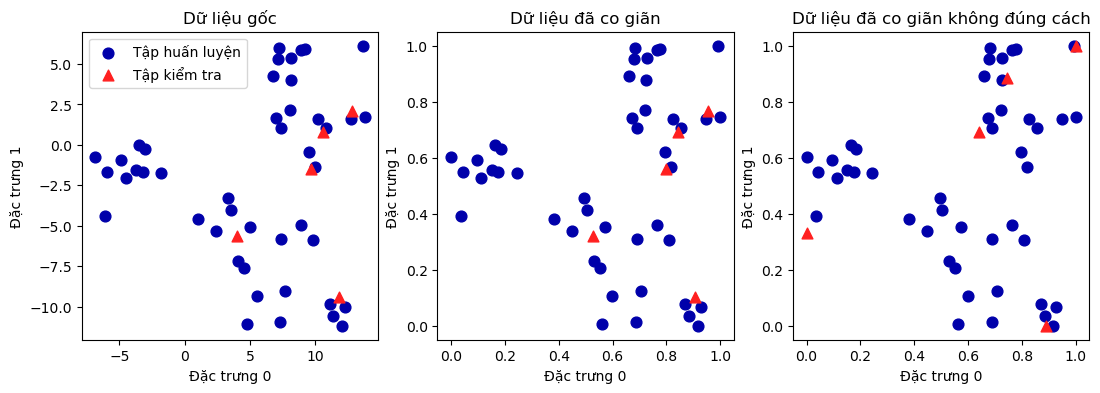

In [16]:
from sklearn.datasets import make_blobs

# tạo dữ liệu tổng hợp
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# chia thành tập huấn luyện và tập kiểm tra
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# vẽ biểu đồ tập huấn luyện và tập kiểm tra
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2(0), label="Tập huấn luyện", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2(1), label="Tập kiểm tra", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Dữ liệu gốc")

# co giãn dữ liệu bằng MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# trực quan hóa dữ liệu đã được co giãn đúng cách
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Tập huấn luyện", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2(1), label="Tập kiểm tra", s=60)
axes[1].set_title("Dữ liệu đã co giãn")

# co giãn lại tập kiểm tra một cách riêng biệt
# sao cho min của tập kiểm tra là 0 và max của tập kiểm tra là 1
# ĐỪNG LÀM VIỆC NÀY! Chỉ nhằm mục đích minh họa.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# trực quan hóa dữ liệu đã co giãn sai cách
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2(0), label="Tập huấn luyện", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
                c=mglearn.cm2(1), label="Tập kiểm tra", s=60)
axes[2].set_title("Dữ liệu đã co giãn không đúng cách")

for ax in axes:
    ax.set_xlabel("Đặc trưng 0")
    ax.set_ylabel("Đặc trưng 1")
plt.show()

**Hình 3-2. Ảnh hưởng của việc co giãn dữ liệu huấn luyện và kiểm tra được hiển thị cùng nhau (giữa) và riêng biệt (phải)** 

Bảng điều khiển đầu tiên là một tập dữ liệu hai chiều chưa được co giãn, với tập huấn luyện được hiển thị dưới dạng các vòng tròn và tập kiểm tra được hiển thị dưới dạng các hình tam giác.  Bảng điều khiển thứ hai là cùng một dữ liệu, nhưng được co giãn bằng `MinMaxScaler`.  Ở đây, chúng ta đã gọi `fit` trên tập huấn luyện, sau đó gọi `transform` trên các tập huấn luyện và kiểm tra.  Bạn có thể thấy rằng tập dữ liệu trong bảng điều khiển thứ hai trông giống hệt với bảng đầu tiên; chỉ có các vạch trên các trục đã thay đổi.  Bây giờ tất cả các đặc trưng đều nằm trong khoảng từ 0 đến 1.  Bạn cũng có thể thấy rằng các giá trị đặc trưng tối thiểu và tối đa cho dữ liệu kiểm tra (các hình tam giác) không phải là 0 và 1. 

Bảng điều khiển thứ ba cho thấy điều gì sẽ xảy ra nếu chúng ta co giãn tập huấn luyện và tập kiểm tra một cách riêng biệt.  Trong trường hợp này, các giá trị đặc trưng tối thiểu và tối đa cho cả tập huấn luyện và tập kiểm tra đều là 0 và 1.  Nhưng bây giờ tập dữ liệu trông khác.  Các điểm kiểm tra đã di chuyển không phù hợp với tập huấn luyện, vì chúng được co giãn khác nhau.  Chúng ta đã thay đổi sự sắp xếp của dữ liệu một cách tùy tiện.  Rõ ràng đây không phải là điều chúng ta muốn làm. 

Một cách khác để nghĩ về điều này, hãy tưởng tượng tập kiểm tra của bạn là một điểm duy nhất.  Không có cách nào để co giãn một điểm duy nhất một cách chính xác, để đáp ứng các yêu cầu tối thiểu và tối đa của `MinMaxScaler`.  Nhưng kích thước của tập kiểm tra của bạn không nên thay đổi quá trình xử lý của bạn. 

### Các phương pháp tắt và các lựa chọn thay thế hiệu quả

Thông thường, bạn muốn khớp một mô hình trên một số tập dữ liệu, sau đó biến đổi nó.  Đây là một nhiệm vụ rất phổ biến, thường có thể được tính toán hiệu quả hơn so với việc chỉ gọi `fit` và sau đó là `transform`.  Đối với trường hợp sử dụng này, tất cả các mô hình có phương thức `transform` cũng có phương thức `fit_transform`.  Dưới đây là một ví dụ sử dụng `StandardScaler`: 

In [17]:
from sklearn.preprocessing import StandardScaler

# Giả sử X là dữ liệu của bạn
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

scaler = StandardScaler()
# gọi fit và transform theo trình tự (sử dụng chuỗi phương thức)
X_scaled = scaler.fit(X).transform(X)
# kết quả tương tự, nhưng tính toán hiệu quả hơn
X_scaled_d = scaler.fit_transform(X)

Mặc dù `fit_transform` không nhất thiết hiệu quả hơn cho tất cả các mô hình, nhưng vẫn là một thực hành tốt để sử dụng phương thức này khi cố gắng biến đổi tập huấn luyện. 

### Ảnh hưởng của Tiền xử lý đến Học có giám sát

Bây giờ hãy quay lại tập dữ liệu ung thư và xem ảnh hưởng của việc sử dụng `MinMaxScaler` đến việc học `SVC` (đây là một cách khác để thực hiện cùng một phép co giãn mà chúng ta đã làm trong Chương 2).  Trước tiên, hãy khớp `SVC` trên dữ liệu gốc một lần nữa để so sánh: 

In [18]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


Bây giờ, hãy co giãn dữ liệu bằng `MinMaxScaler` trước khi khớp `SVC`:

In [19]:
# tiền xử lý bằng co giãn 0-1
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# học một SVM trên dữ liệu huấn luyện đã co giãn
svm.fit(X_train_scaled, y_train)

# chấm điểm trên tập kiểm tra đã co giãn
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


Như chúng ta đã thấy trước đây, ảnh hưởng của việc co giãn dữ liệu là khá đáng kể.  Mặc dù việc co giãn dữ liệu không liên quan đến bất kỳ phép toán phức tạp nào, nhưng vẫn là một thực hành tốt để sử dụng các cơ chế co giãn do scikit-learn cung cấp thay vì tự triển khai lại chúng, vì rất dễ mắc lỗi ngay cả trong những phép tính đơn giản này. 

Bạn cũng có thể dễ dàng thay thế một giải thuật tiền xử lý bằng một giải thuật khác bằng cách thay đổi lớp bạn sử dụng, vì tất cả các lớp tiền xử lý đều có cùng một giao diện, bao gồm các phương thức `fit` và `transform`: 

In [20]:
# tiền xử lý bằng co giãn trung bình bằng không và phương sai đơn vị
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# học một SVM trên dữ liệu huấn luyện đã co giãn
svm.fit(X_train_scaled, y_train)
# chấm điểm trên tập kiểm tra đã co giãn
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


Bây giờ chúng ta đã thấy cách các phép biến đổi dữ liệu đơn giản để tiền xử lý hoạt động, hãy chuyển sang các phép biến đổi thú vị hơn bằng cách sử dụng học không giám sát. 

## Giảm chiều, Trích xuất Đặc trưng, và Học Đa tạp (Manifold Learning)

Như chúng ta đã thảo luận trước đó, việc biến đổi dữ liệu bằng học không giám sát có thể có nhiều động cơ.  Các động cơ phổ biến nhất là trực quan hóa, nén dữ liệu, và tìm một biểu diễn nhiều thông tin hơn cho quá trình xử lý tiếp theo.  Một trong những giải thuật đơn giản và được sử dụng rộng rãi nhất cho tất cả những điều này là phân tích thành phần chính.  Chúng ta cũng sẽ xem xét hai giải thuật khác: phân rã ma trận không âm (NMF), thường được sử dụng để trích xuất đặc trưng, và t-SNE, thường được sử dụng để trực quan hóa bằng biểu đồ phân tán hai chiều. 

### Phân tích Thành phần Chính (PCA)

Phân tích thành phần chính là một phương pháp xoay tập dữ liệu sao cho các đặc trưng đã xoay không tương quan thống kê với nhau.  Phép xoay này thường được theo sau bởi việc chỉ chọn một tập hợp con của các đặc trưng mới, tùy thuộc vào tầm quan trọng của chúng trong việc giải thích dữ liệu.  Ví dụ sau (Hình 3-3) minh họa ảnh hưởng của PCA trên một tập dữ liệu hai chiều tổng hợp: 

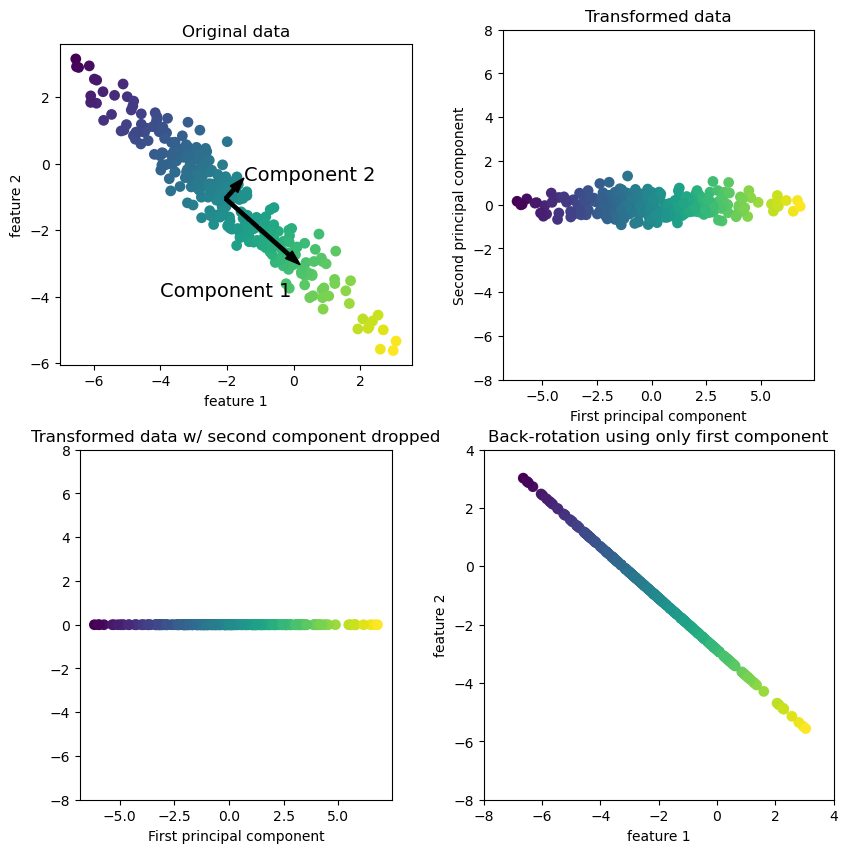

In [21]:
mglearn.plots.plot_pca_illustration()

**Hình 3-3. Biến đổi dữ liệu bằng PCA** 

Biểu đồ đầu tiên (trên cùng bên trái) hiển thị các điểm dữ liệu ban đầu, được tô màu để phân biệt chúng.  Giải thuật tiến hành bằng cách đầu tiên tìm hướng có phương sai lớn nhất, được gắn nhãn "Thành phần 1".  Đây là hướng (hoặc vector) trong dữ liệu chứa nhiều thông tin nhất, hoặc nói cách khác, là hướng mà dọc theo đó các đặc trưng tương quan với nhau nhiều nhất.  Sau đó, giải thuật tìm hướng chứa nhiều thông tin nhất trong khi vẫn trực giao (vuông góc) với hướng đầu tiên.  Trong không gian hai chiều, chỉ có một hướng khả dĩ duy nhất là vuông góc, nhưng trong không gian nhiều chiều hơn sẽ có (vô số) các hướng trực giao.  Mặc dù hai thành phần được vẽ dưới dạng mũi tên, nhưng đầu và đuôi của chúng không thực sự quan trọng;  chúng ta có thể đã vẽ thành phần thứ nhất từ trung tâm lên trên bên trái thay vì xuống dưới bên phải.  Các hướng được tìm thấy bằng quy trình này được gọi là các thành phần chính, vì chúng là các hướng phương sai chính trong dữ liệu.  Nói chung, có bao nhiêu thành phần chính thì có bấy nhiêu đặc trưng ban đầu. 

Biểu đồ thứ hai (trên cùng bên phải) hiển thị cùng một dữ liệu, nhưng bây giờ được xoay sao cho thành phần chính thứ nhất thẳng hàng với trục x và thành phần chính thứ hai thẳng hàng với trục y.  Trước khi xoay, giá trị trung bình đã được trừ khỏi dữ liệu, do đó dữ liệu đã biến đổi được căn giữa quanh số không.  Trong biểu diễn đã xoay được tìm thấy bởi PCA, hai trục không tương quan, có nghĩa là ma trận tương quan của dữ liệu trong biểu diễn này bằng không ngoại trừ đường chéo. 

Chúng ta có thể sử dụng PCA để giảm chiều bằng cách chỉ giữ lại một số thành phần chính.  Trong ví dụ này, chúng ta có thể chỉ giữ lại thành phần chính thứ nhất, như được hiển thị trong bảng điều khiển thứ ba trong Hình 3-3 (dưới cùng bên trái).  Điều này làm giảm dữ liệu từ một tập dữ liệu hai chiều thành một tập dữ liệu một chiều.  Tuy nhiên, lưu ý rằng thay vì chỉ giữ lại một trong các đặc trưng ban đầu, chúng ta đã tìm thấy hướng thú vị nhất (từ trên cùng bên trái đến dưới cùng bên phải trong bảng điều khiển đầu tiên) và giữ lại hướng này, thành phần chính thứ nhất. 

Cuối cùng, chúng ta có thể hoàn tác phép xoay và cộng lại giá trị trung bình vào dữ liệu.  Điều này sẽ dẫn đến dữ liệu được hiển thị trong bảng điều khiển cuối cùng trong Hình 3-3.  Những điểm này nằm trong không gian đặc trưng ban đầu, nhưng chúng ta chỉ giữ lại thông tin chứa trong thành phần chính thứ nhất.  Phép biến đổi này đôi khi được sử dụng để loại bỏ hiệu ứng nhiễu từ dữ liệu hoặc trực quan hóa phần thông tin nào được giữ lại bằng cách sử dụng các thành phần chính. 

#### Áp dụng PCA cho tập dữ liệu ung thư để trực quan hóa

Một trong những ứng dụng phổ biến nhất của PCA là trực quan hóa các tập dữ liệu nhiều chiều.  Như chúng ta đã thấy trong Chương 1, rất khó để tạo biểu đồ phân tán của dữ liệu có nhiều hơn hai đặc trưng.  Đối với tập dữ liệu Iris, chúng ta đã có thể tạo một biểu đồ cặp (Hình 1-3 trong Chương 1) đã cho chúng ta một bức tranh một phần của dữ liệu bằng cách hiển thị tất cả các kết hợp có thể có của hai đặc trưng.  Nhưng nếu chúng ta muốn xem xét tập dữ liệu Ung thư vú, ngay cả việc sử dụng biểu đồ cặp cũng rất khó khăn.  Tập dữ liệu này có 30 đặc trưng, sẽ dẫn đến 30 * 14 = 420 biểu đồ phân tán!  Chúng ta sẽ không bao giờ có thể xem xét tất cả các biểu đồ này một cách chi tiết, chứ đừng nói đến việc cố gắng hiểu chúng. 

Tuy nhiên, có một cách trực quan hóa thậm chí còn đơn giản hơn mà chúng ta có thể sử dụng—tính toán biểu đồ tần suất của mỗi đặc trưng cho hai lớp, ung thư lành tính và ác tính (Hình 3-4): 

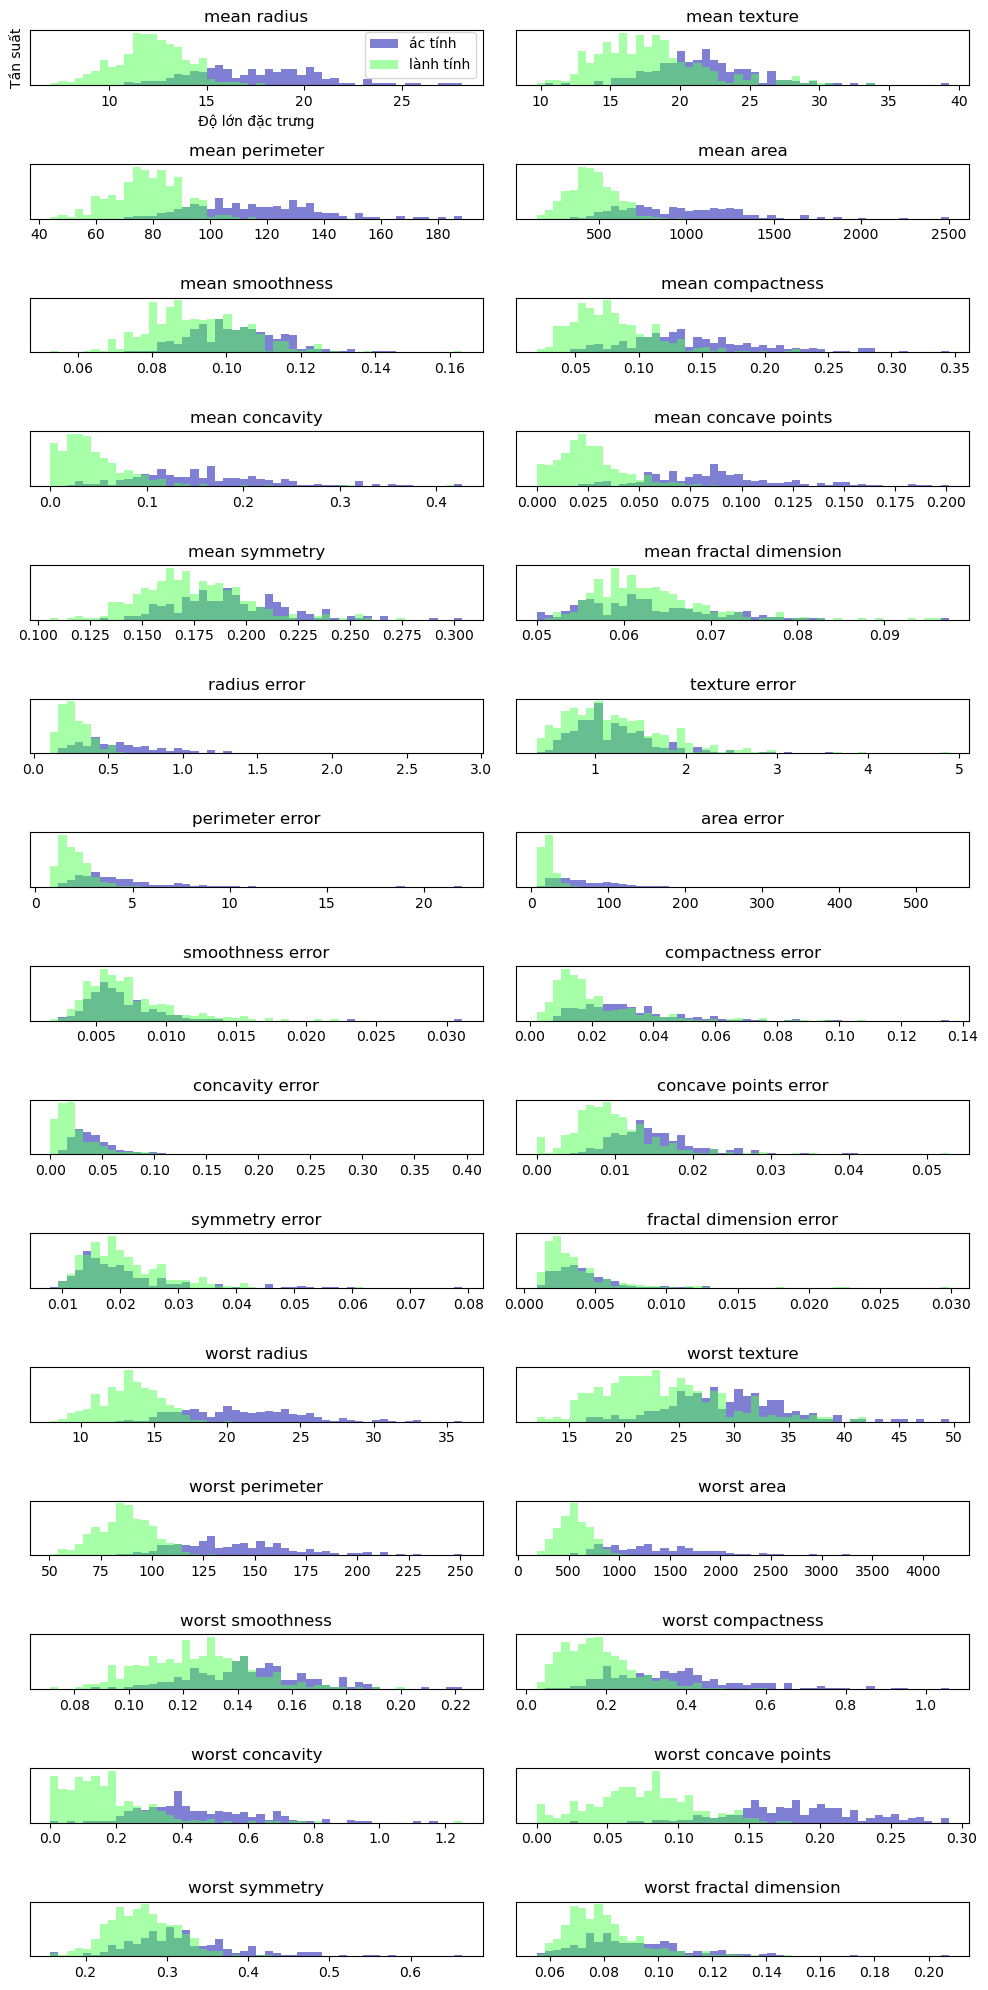

In [22]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Độ lớn đặc trưng")
ax[0].set_ylabel("Tần suất")
ax[0].legend(["ác tính", "lành tính"], loc="best")
fig.tight_layout()
plt.show()

**Hình 3-4. Biểu đồ tần suất đặc trưng theo lớp trên tập dữ liệu Ung thư vú** 

Ở đây chúng ta tạo một biểu đồ tần suất cho mỗi đặc trưng, đếm số lần một điểm dữ liệu xuất hiện với một đặc trưng trong một phạm vi nhất định (gọi là một bin).  Mỗi biểu đồ chồng hai biểu đồ tần suất lên nhau, một cho tất cả các điểm trong lớp lành tính (màu xanh) và một cho tất cả các điểm trong lớp ác tính (màu đỏ).  Điều này cho chúng ta một số ý tưởng về cách mỗi đặc trưng được phân phối trên hai lớp, và cho phép chúng ta đoán xem đặc trưng nào tốt hơn trong việc phân biệt các mẫu ác tính và lành tính.  Ví dụ, đặc trưng "smoothness error" có vẻ khá ít thông tin, vì hai biểu đồ tần suất hầu như chồng chéo lên nhau, trong khi đặc trưng "worst concave points" có vẻ khá nhiều thông tin, vì các biểu đồ tần suất khá rời rạc. 

Tuy nhiên, biểu đồ này không cho chúng ta thấy bất cứ điều gì về sự tương tác giữa các biến và cách chúng liên quan đến các lớp.  Sử dụng PCA, chúng ta có thể nắm bắt các tương tác chính và có được một bức tranh hoàn chỉnh hơn một chút.  Chúng ta có thể tìm thấy hai thành phần chính đầu tiên, và trực quan hóa dữ liệu trong không gian hai chiều mới này bằng một biểu đồ phân tán duy nhất. 

Trước khi áp dụng PCA, chúng ta co giãn dữ liệu sao cho mỗi đặc trưng có phương sai đơn vị bằng cách sử dụng `StandardScaler`: 

In [23]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

Học phép biến đổi PCA và áp dụng nó đơn giản như áp dụng một phép biến đổi tiền xử lý.  Chúng ta khởi tạo đối tượng `PCA`, tìm các thành phần chính bằng cách gọi phương thức `fit`, sau đó áp dụng phép xoay và giảm chiều bằng cách gọi `transform`.  Theo mặc định, PCA chỉ xoay (và dịch chuyển) dữ liệu, nhưng giữ lại tất cả các thành phần chính.  Để giảm chiều của dữ liệu, chúng ta cần chỉ định số lượng thành phần chúng ta muốn giữ lại khi tạo đối tượng `PCA`: 

In [24]:
from sklearn.decomposition import PCA

# giữ hai thành phần chính đầu tiên của dữ liệu
pca = PCA(n_components=2)
# khớp mô hình PCA với dữ liệu ung thư vú
pca.fit(X_scaled)

# biến đổi dữ liệu lên hai thành phần chính đầu tiên
X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Bây giờ chúng ta có thể vẽ hai thành phần chính đầu tiên (Hình 3-5): 

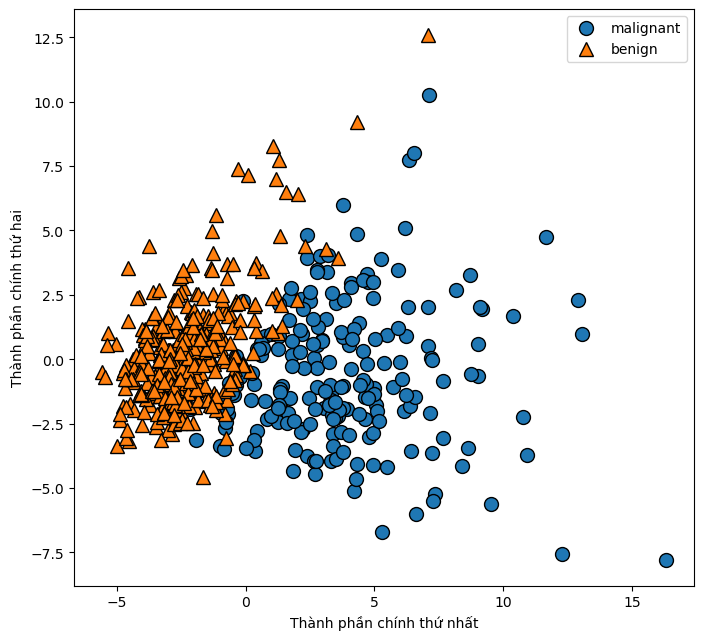

In [25]:
# vẽ thành phần chính thứ nhất so với thứ hai, được tô màu theo lớp
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("Thành phần chính thứ nhất")
plt.ylabel("Thành phần chính thứ hai")
plt.show()

**Hình 3-5. Biểu đồ phân tán hai chiều của tập dữ liệu Ung thư vú sử dụng hai thành phần chính đầu tiên** 

Điều quan trọng cần lưu ý là PCA là một phương pháp không giám sát và không sử dụng bất kỳ thông tin lớp nào khi tìm phép xoay.  Nó chỉ đơn giản là xem xét các mối tương quan trong dữ liệu.  Đối với biểu đồ phân tán được hiển thị ở đây, chúng ta đã vẽ thành phần chính thứ nhất so với thành phần chính thứ hai, sau đó sử dụng thông tin lớp để tô màu các điểm.  Bạn có thể thấy rằng hai lớp phân tách khá tốt trong không gian hai chiều này.  Điều này khiến chúng ta tin rằng ngay cả một bộ phân loại tuyến tính (sẽ học một đường thẳng trong không gian này) cũng có thể làm khá tốt trong việc phân biệt hai lớp.  Chúng ta cũng có thể thấy rằng các điểm ác tính (màu đỏ) phân tán rộng hơn các điểm lành tính (màu xanh)—một điều mà chúng ta đã có thể thấy một chút từ các biểu đồ tần suất trong Hình 3-4. 

Một nhược điểm của PCA là hai trục trong biểu đồ thường không dễ diễn giải.  Các thành phần chính tương ứng với các hướng trong dữ liệu gốc, vì vậy chúng là sự kết hợp của các đặc trưng ban đầu.  Tuy nhiên, những sự kết hợp này thường rất phức tạp, như chúng ta sẽ thấy ngay sau đây.  Các thành phần chính được lưu trữ trong thuộc tính `components_` của đối tượng PCA trong quá trình khớp: 

In [26]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Mỗi hàng trong `components_` tương ứng với một thành phần chính, và chúng được sắp xếp theo tầm quan trọng của chúng (thành phần chính thứ nhất đứng đầu, v.v.).  Các cột tương ứng với thuộc tính đặc trưng ban đầu của PCA trong ví dụ này, "mean radius," "mean texture," v.v.  Hãy xem nội dung của `components_`: 

In [27]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Chúng ta cũng có thể trực quan hóa các hệ số bằng cách sử dụng bản đồ nhiệt (Hình 3-6), có thể dễ hiểu hơn: 

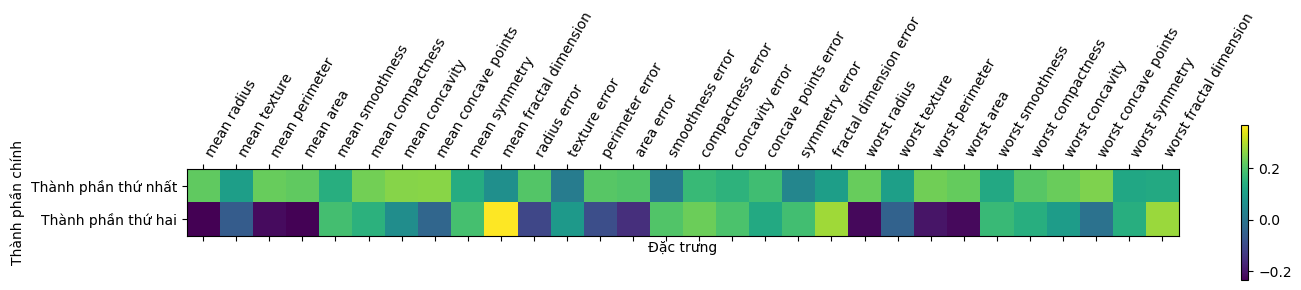

In [28]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["Thành phần thứ nhất", "Thành phần thứ hai"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Đặc trưng")
plt.ylabel("Thành phần chính")
plt.show()

**Hình 3-6. Bản đồ nhiệt của hai thành phần chính đầu tiên trên tập dữ liệu Ung thư vú** 

Bạn có thể thấy rằng trong thành phần thứ nhất, tất cả các đặc trưng đều có cùng dấu (nó là âm, nhưng như chúng ta đã đề cập trước đó, hướng của mũi tên không quan trọng).  Điều đó có nghĩa là có một mối tương quan chung giữa tất cả các đặc trưng.  Khi một phép đo cao, các phép đo khác cũng có khả năng cao.  Thành phần thứ hai có các dấu hỗn hợp, và cả hai thành phần đều liên quan đến tất cả 30 đặc trưng.  Sự pha trộn của tất cả các đặc trưng này là điều làm cho việc giải thích các trục trong Hình 3-6 trở nên khó khăn. 

#### Các khuôn mặt đặc trưng (Eigenfaces) để trích xuất đặc trưng

Một ứng dụng khác của PCA mà chúng ta đã đề cập trước đó là trích xuất đặc trưng. Ý tưởng đằng sau việc trích xuất đặc trưng là có thể tìm ra một biểu diễn dữ liệu của bạn phù hợp hơn cho việc phân tích so với biểu diễn thô mà bạn được cung cấp. Một ví dụ tuyệt vời về một ứng dụng mà việc trích xuất đặc trưng hữu ích là với hình ảnh. Hình ảnh được tạo thành từ các pixel, thường được lưu trữ dưới dạng cường độ đỏ, xanh lá cây và xanh lam (RGB). Các đối tượng trong hình ảnh thường được tạo thành từ hàng nghìn pixel, và chỉ khi kết hợp lại chúng mới có ý nghĩa. Chúng ta sẽ đưa ra một ứng dụng rất đơn giản về trích xuất đặc trưng trên hình ảnh bằng PCA, bằng cách làm việc với các hình ảnh khuôn mặt từ tập dữ liệu Labeled Faces in the Wild. Tập dữ liệu này chứa các hình ảnh khuôn mặt của những người nổi tiếng được tải xuống từ Internet, và nó bao gồm các khuôn mặt của các chính trị gia, ca sĩ, diễn viên và vận động viên từ đầu những năm 2000. Chúng ta sử dụng các phiên bản thang độ xám của những hình ảnh này, và thu nhỏ chúng để xử lý nhanh hơn. Bạn có thể thấy một số hình ảnh trong Hình 3-7:

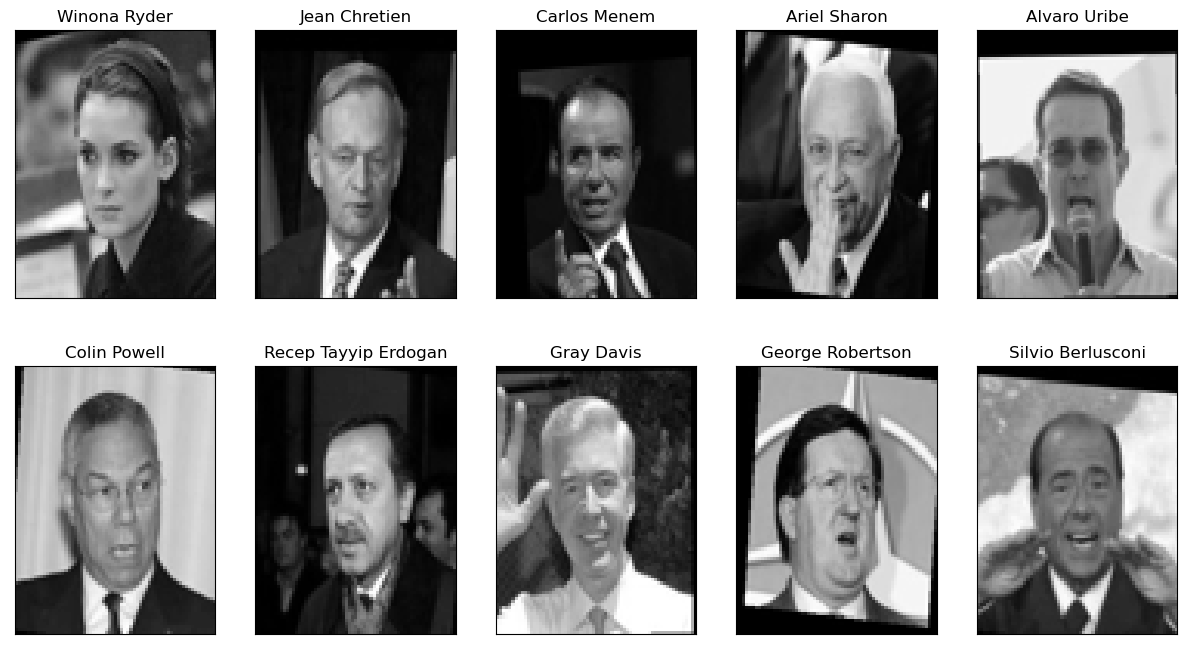

In [29]:
from sklearn.datasets import fetch_lfw_people
import numpy as np
import matplotlib.pyplot as plt
import mglearn

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                       subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image, cmap='gray')
    ax.set_title(people.target_names[target])
plt.show()

**Hình 3-7. Một số hình ảnh từ tập dữ liệu Labeled Faces in the Wild **

Có 3.023 hình ảnh, mỗi hình có kích thước 87x65 pixel, thuộc về 62 người khác nhau:

In [30]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


Tuy nhiên, tập dữ liệu có một chút sai lệch, chứa rất nhiều hình ảnh của George W. Bush và Colin Powell, như bạn có thể thấy ở đây:

In [31]:
# đếm số lần mỗi mục tiêu xuất hiện
counts = np.bincount(people.target)
# in số đếm bên cạnh tên mục tiêu
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

Để làm cho dữ liệu ít sai lệch hơn, chúng ta sẽ chỉ lấy tối đa 50 hình ảnh của mỗi người (nếu không, việc trích xuất đặc trưng sẽ bị lấn át bởi khả năng xuất hiện của George W. Bush):

In [32]:
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# co giãn các giá trị thang độ xám để nằm trong khoảng từ 0 đến 1
# thay vì từ 0 đến 255 để ổn định số học tốt hơn
X_people = X_people / 255.

Một nhiệm vụ phổ biến trong nhận dạng khuôn mặt là hỏi xem một khuôn mặt chưa từng thấy trước đây có thuộc về một người đã biết trong cơ sở dữ liệu hay không. Điều này có ứng dụng trong các bộ sưu tập ảnh, phương tiện truyền thông xã hội và các ứng dụng bảo mật. Một cách để giải quyết vấn đề này là xây dựng một bộ phân loại trong đó mỗi người là một lớp riêng biệt. Tuy nhiên, thường có rất nhiều người khác nhau trong cơ sở dữ liệu khuôn mặt, và rất ít hình ảnh của cùng một người (tức là, rất ít ví dụ huấn luyện cho mỗi lớp). Điều đó làm cho việc huấn luyện hầu hết các bộ phân loại trở nên khó khăn. Ngoài ra, bạn thường muốn có thể thêm người mới một cách dễ dàng mà không cần phải huấn luyện lại một mô hình lớn.

Một giải pháp đơn giản là sử dụng một bộ phân loại k láng giềng gần nhất (one-nearest-neighbor) tìm kiếm hình ảnh khuôn mặt tương tự nhất với khuôn mặt bạn đang phân loại. Bộ phân loại này về nguyên tắc có thể hoạt động chỉ với một ví dụ huấn luyện cho mỗi lớp. Hãy xem `KNeighborsClassifier` hoạt động tốt như thế nào ở đây:

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# xây dựng một KNeighborsClassifier sử dụng một láng giềng
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.14


Chúng ta đạt được độ chính xác 27%, thực ra không tệ đối với một bài toán phân loại 62 lớp (đoán ngẫu nhiên sẽ cho bạn độ chính xác khoảng 1/62 = 1.6%), nhưng cũng không tuyệt vời. Chúng ta chỉ nhận dạng đúng một người sau mỗi bốn lần thử.

Đây là lúc PCA phát huy tác dụng. Việc tính toán khoảng cách trong không gian pixel ban đầu là một cách khá tồi để đo lường sự tương đồng giữa các khuôn mặt. Khi sử dụng biểu diễn pixel để so sánh hai hình ảnh, chúng ta so sánh giá trị thang độ xám của từng pixel riêng lẻ với giá trị của pixel ở vị trí tương ứng trong hình ảnh kia. Biểu diễn này khá khác so với cách con người giải thích hình ảnh của một khuôn mặt, và rất khó để nắm bắt các đặc điểm trên khuôn mặt bằng cách sử dụng biểu diễn thô này. Ví dụ, sử dụng khoảng cách pixel có nghĩa là việc dịch chuyển một khuôn mặt sang phải một pixel tương ứng với một sự thay đổi mạnh mẽ, với một biểu diễn hoàn toàn khác. Chúng tôi hy vọng rằng việc sử dụng khoảng cách dọc theo các thành phần chính có thể cải thiện độ chính xác của chúng ta. Ở đây, chúng tôi kích hoạt tùy chọn `whitening` của PCA, giúp co giãn lại các thành phần chính để có cùng một thang đo. Điều này tương tự như việc sử dụng `StandardScaler` sau khi biến đổi. Sử dụng lại dữ liệu từ Hình 3-3, whitening không chỉ tương ứng với việc xoay dữ liệu mà còn co giãn lại nó để bảng điều khiển trung tâm là một vòng tròn thay vì một hình elip (xem Hình 3-8):

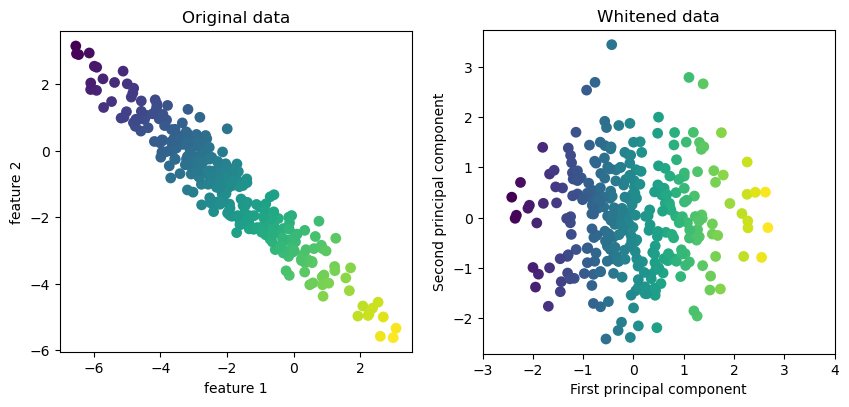

In [34]:
mglearn.plots.plot_pca_whitening()

**Hình 3-8. Biến đổi dữ liệu bằng PCA sử dụng whitening **

Chúng tôi khớp đối tượng PCA với dữ liệu huấn luyện và trích xuất 100 thành phần chính đầu tiên. Sau đó, chúng tôi biến đổi dữ liệu huấn luyện và kiểm tra:

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


Dữ liệu mới có 100 đặc trưng, là 100 thành phần chính đầu tiên. Bây giờ, chúng ta có thể sử dụng biểu diễn mới để phân loại hình ảnh của mình bằng bộ phân loại một láng giềng gần nhất:

In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.15


Độ chính xác của chúng ta đã cải thiện khá đáng kể, từ 26.6% lên 31.3%, xác nhận trực giác của chúng ta rằng các thành phần chính có thể cung cấp một biểu diễn tốt hơn cho dữ liệu.

Đối với dữ liệu hình ảnh, chúng ta cũng có thể dễ dàng trực quan hóa các thành phần chính được tìm thấy. Hãy nhớ rằng các thành phần tương ứng với các hướng trong không gian đầu vào. Không gian đầu vào ở đây là các hình ảnh thang độ xám có kích thước 87x65 pixel, vì vậy các hướng trong không gian này cũng là các hình ảnh thang độ xám 87x65 pixel. Hãy xem xét một vài thành phần chính đầu tiên (Hình 3-9):

In [37]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


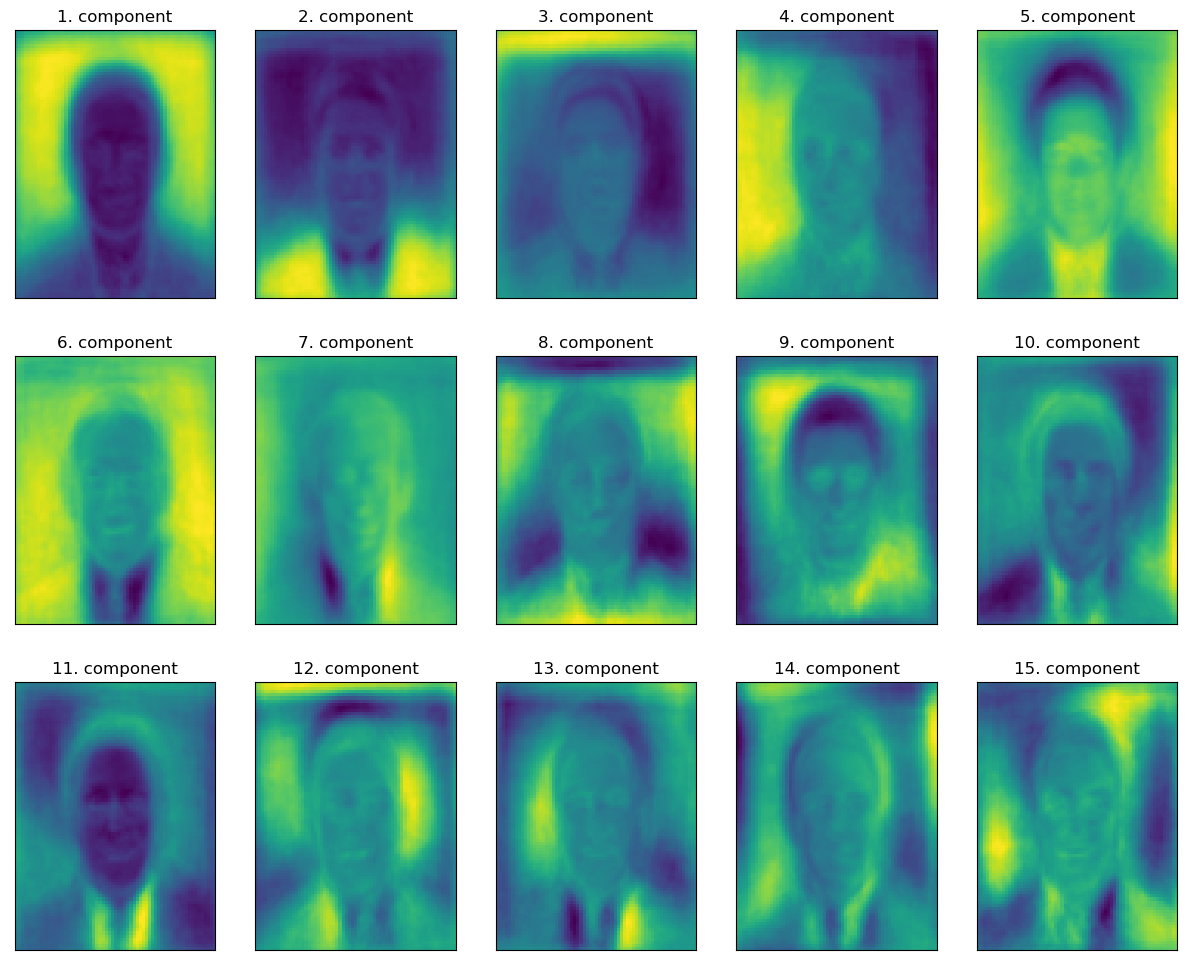

In [38]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                       subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))
plt.show()

**Hình 3-9. Các vector thành phần của 15 thành phần chính đầu tiên của tập dữ liệu khuôn mặt **

Mặc dù chúng ta chắc chắn không thể hiểu hết tất cả các khía cạnh của những thành phần này, chúng ta có thể đoán được một số khía cạnh của hình ảnh khuôn mặt mà một số thành phần đang nắm bắt. Thành phần đầu tiên dường như chủ yếu mã hóa sự tương phản giữa khuôn mặt và nền, thành phần thứ hai mã hóa sự khác biệt về ánh sáng giữa nửa bên phải và nửa bên trái của khuôn mặt, v.v.. Mặc dù biểu diễn này có phần ngữ nghĩa hơn so với các giá trị pixel thô, nó vẫn còn khá xa so với cách con người có thể cảm nhận một khuôn mặt. Vì mô hình PCA dựa trên pixel, việc căn chỉnh khuôn mặt (vị trí của mắt, cằm và mũi) và ánh sáng đều có ảnh hưởng mạnh mẽ đến mức độ tương tự của hai hình ảnh trong biểu diễn pixel của chúng. Nhưng việc căn chỉnh và ánh sáng có lẽ không phải là những gì con người sẽ cảm nhận đầu tiên. Khi yêu cầu mọi người đánh giá sự tương đồng của các khuôn mặt, họ có nhiều khả năng sử dụng các thuộc tính như tuổi tác, giới tính, biểu cảm khuôn mặt và kiểu tóc, là những thuộc tính khó suy ra từ cường độ pixel. Điều quan trọng cần ghi nhớ là các thuật toán thường diễn giải dữ liệu (đặc biệt là dữ liệu trực quan, chẳng hạn như hình ảnh, mà con người rất quen thuộc) hoàn toàn khác với cách con người làm.

Tuy nhiên, hãy quay lại trường hợp cụ thể của PCA. Chúng ta đã giới thiệu phép biến đổi PCA là xoay dữ liệu và sau đó loại bỏ các thành phần có phương sai thấp. Một cách diễn giải hữu ích khác là cố gắng tìm một số con số (các giá trị đặc trưng mới sau khi xoay PCA) để chúng ta có thể biểu diễn các điểm kiểm tra dưới dạng tổng có trọng số của các thành phần chính (xem Hình 3-10).

Ở đây, x₀, x₁, v.v. là các hệ số của các thành phần chính cho điểm dữ liệu này; nói cách khác, chúng là biểu diễn của hình ảnh trong không gian đã xoay.

**Hình 3-10. Sơ đồ PCA dưới dạng phân tách một hình ảnh thành tổng có trọng số của các thành phần **

Một cách khác chúng ta có thể cố gắng hiểu một mô hình PCA đang làm gì là bằng cách xem xét các tái tạo của dữ liệu gốc chỉ sử dụng một số thành phần. Trong Hình 3-3, sau khi loại bỏ thành phần thứ hai và đến bảng điều khiển thứ ba, chúng ta đã hoàn tác phép xoay và cộng lại giá trị trung bình để thu được các điểm mới trong không gian ban đầu với thành phần thứ hai bị loại bỏ, như được hiển thị trong bảng điều khiển cuối cùng. Chúng ta có thể thực hiện một phép biến đổi tương tự cho các khuôn mặt bằng cách giảm dữ liệu xuống chỉ còn một số thành phần chính và sau đó xoay trở lại không gian ban đầu. Việc quay trở lại không gian đặc trưng ban đầu này có thể được thực hiện bằng phương thức `inverse_transform`. Ở đây, chúng ta trực quan hóa việc tái tạo một số khuôn mặt bằng cách sử dụng 10, 50, 100, hoặc 2.000 thành phần (Hình 3-11):

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[3.183391e-03, ..., 7.689351e-05],
       ...,
       [1.896706e-04, ..., 0.000000e+00]], dtype=float32), 
array([[0.000000e+00, ..., 0.000000e+00],
       ...,
       [2.050493e-05, ..., 3.019352e-03]], dtype=float32))
________________________________________________________pca_faces - 1.2s, 0.0min


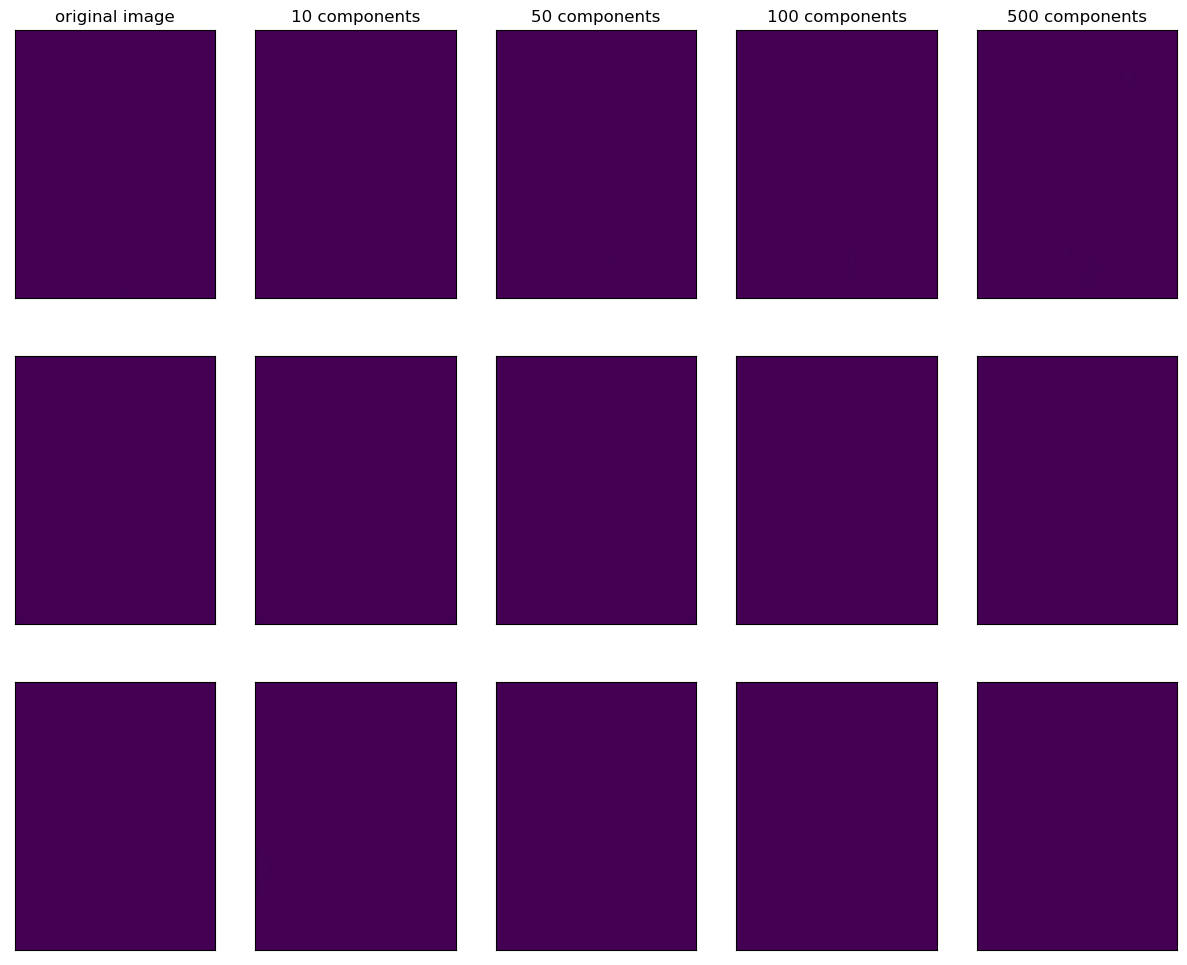

In [39]:
# Tái tạo lại X_train, X_test từ phiên bản đã giảm chiều để minh họa
pca_for_plot = PCA(n_components=150, whiten=True, random_state=0).fit(X_train)
X_train_pca_for_plot = pca_for_plot.transform(X_train)
X_test_pca_for_plot = pca_for_plot.transform(X_test)

mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

**Hình 3-11. Tái tạo ba hình ảnh khuôn mặt bằng cách sử dụng số lượng thành phần chính ngày càng tăng **

Bạn có thể thấy rằng khi chúng ta chỉ sử dụng 10 thành phần chính đầu tiên, chỉ có bản chất của bức ảnh, như hướng khuôn mặt và ánh sáng, được ghi lại. Bằng cách sử dụng ngày càng nhiều thành phần chính, ngày càng nhiều chi tiết trong hình ảnh được bảo toàn. Điều này tương ứng với việc mở rộng tổng trong Hình 3-10 để bao gồm ngày càng nhiều số hạng. Sử dụng số lượng thành phần bằng số lượng pixel có nghĩa là chúng ta sẽ không loại bỏ bất kỳ thông tin nào sau khi xoay, và chúng ta sẽ tái tạo lại hình ảnh một cách hoàn hảo.

Chúng ta cũng có thể thử sử dụng PCA để trực quan hóa tất cả các khuôn mặt trong tập dữ liệu trong một biểu đồ phân tán bằng cách sử dụng hai thành phần chính đầu tiên (Hình 3-12), với các lớp được đưa ra bởi người được hiển thị trong hình ảnh, tương tự như những gì chúng ta đã làm cho tập dữ liệu ung thư:

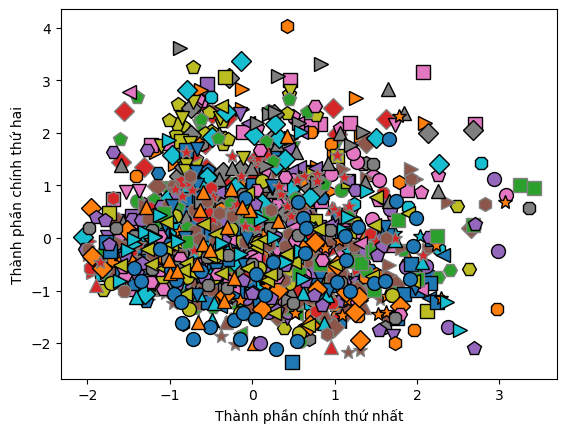

In [40]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("Thành phần chính thứ nhất")
plt.ylabel("Thành phần chính thứ hai")
plt.show()

**Hình 3-12. Biểu đồ phân tán của tập dữ liệu khuôn mặt sử dụng hai thành phần chính đầu tiên (xem Hình 3-5 để biết hình ảnh tương ứng cho tập dữ liệu ung thư) **

Như bạn có thể thấy, khi chúng ta chỉ sử dụng hai thành phần chính đầu tiên, toàn bộ dữ liệu chỉ là một khối lớn, không có sự phân tách các lớp nào có thể nhìn thấy. Điều này không có gì đáng ngạc nhiên, vì ngay cả với 10 thành phần, như đã trình bày trước đó trong Hình 3-11, PCA chỉ nắm bắt được các đặc điểm rất thô của khuôn mặt.

### Phân rã Ma trận không âm (NMF)

Phân rã ma trận không âm là một thuật toán học không giám sát khác nhằm mục đích trích xuất các đặc trưng hữu ích. Nó hoạt động tương tự như PCA và cũng có thể được sử dụng để giảm chiều. Giống như trong PCA, chúng ta đang cố gắng viết mỗi điểm dữ liệu dưới dạng tổng có trọng số của một số thành phần, như được minh họa trong Hình 3-10. Nhưng trong khi ở PCA, chúng ta muốn các thành phần trực giao và giải thích càng nhiều phương sai của dữ liệu càng tốt, thì trong NMF, chúng ta muốn các thành phần và hệ số là không âm; tức là, chúng ta muốn cả thành phần và hệ số đều lớn hơn hoặc bằng không. Do đó, phương pháp này chỉ có thể được áp dụng cho dữ liệu mà mỗi đặc trưng là không âm, vì một tổng không âm của các thành phần không âm không thể trở thành âm.

Quá trình phân rã dữ liệu thành một tổng có trọng số không âm đặc biệt hữu ích cho dữ liệu được tạo ra dưới dạng phép cộng (hoặc chồng chéo) của một số nguồn độc lập, chẳng hạn như một bản âm thanh của nhiều người nói, hoặc âm nhạc có nhiều nhạc cụ. Trong những tình huống này, NMF có thể xác định các thành phần ban đầu tạo nên dữ liệu kết hợp. Nhìn chung, NMF dẫn đến các thành phần dễ diễn giải hơn PCA, vì các thành phần và hệ số âm có thể dẫn đến các hiệu ứng triệt tiêu khó diễn giải. Ví dụ, các eigenfaces trong Hình 3-9 chứa cả phần dương và phần âm, và như chúng ta đã đề cập trong mô tả về PCA, dấu thực sự là tùy ý. Trước khi chúng ta áp dụng NMF cho tập dữ liệu khuôn mặt, hãy xem lại ngắn gọn dữ liệu tổng hợp.

#### Áp dụng NMF cho dữ liệu tổng hợp

Trái ngược với khi sử dụng PCA, chúng ta cần đảm bảo rằng dữ liệu của chúng ta là dương để NMF có thể hoạt động trên dữ liệu. Điều này có nghĩa là vị trí dữ liệu so với gốc tọa độ (0, 0) thực sự quan trọng đối với NMF. Do đó, bạn có thể nghĩ về các thành phần không âm được trích xuất là các hướng từ (0, 0) về phía dữ liệu.

Ví dụ sau (Hình 3-13) cho thấy kết quả của NMF trên dữ liệu đồ chơi hai chiều:

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


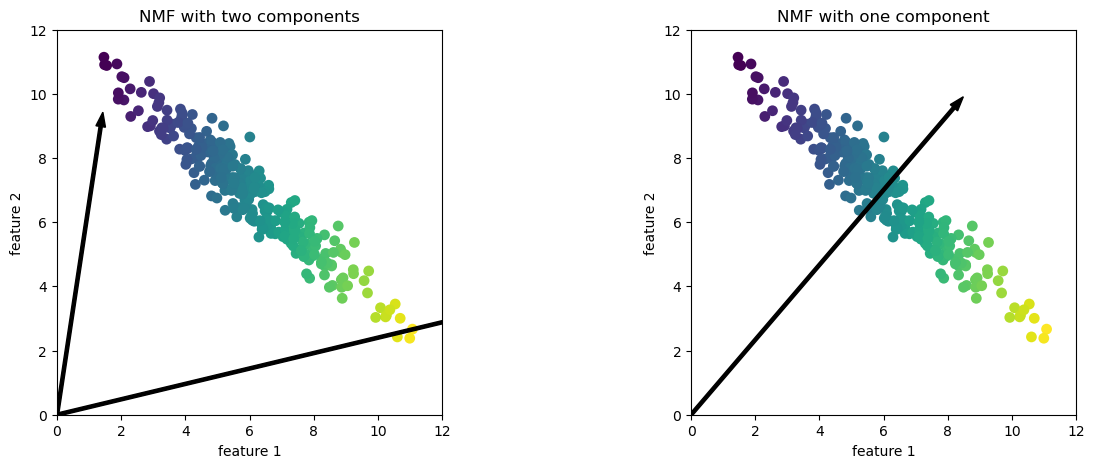

In [41]:
mglearn.plots.plot_nmf_illustration()

**Hình 3-13. Các thành phần được tìm thấy bởi phân rã ma trận không âm với hai thành phần (trái) và một thành phần (phải) **

Đối với NMF có hai thành phần, như hình bên trái, rõ ràng là tất cả các điểm trong dữ liệu có thể được viết dưới dạng một tổ hợp dương của hai thành phần. Nếu có đủ thành phần để tái tạo hoàn hảo dữ liệu (số lượng thành phần bằng số lượng đặc trưng), thuật toán sẽ chọn các hướng chỉ về các điểm cực trị của dữ liệu. Nếu chúng ta chỉ sử dụng một thành phần, NMF sẽ tạo ra một thành phần chỉ về phía trung bình, vì việc chỉ về đó giải thích dữ liệu tốt nhất. Bạn có thể thấy rằng trái ngược với PCA, việc giảm số lượng thành phần không chỉ loại bỏ một số hướng mà còn tạo ra một tập hợp các thành phần hoàn toàn khác!  Các thành phần trong NMF cũng không được sắp xếp theo bất kỳ thứ tự cụ thể nào, vì vậy không có "thành phần không âm thứ nhất": tất cả các thành phần đều đóng một vai trò như nhau. NMF sử dụng một khởi tạo ngẫu nhiên, có thể dẫn đến các kết quả khác nhau tùy thuộc vào hạt giống ngẫu nhiên. Trong các trường hợp tương đối đơn giản như dữ liệu tổng hợp có hai thành phần, nơi tất cả dữ liệu có thể được giải thích một cách hoàn hảo, tính ngẫu nhiên có ít ảnh hưởng (mặc dù nó có thể thay đổi thứ tự hoặc thang đo của các thành phần). Trong các tình huống phức tạp hơn, có thể có những thay đổi mạnh mẽ hơn.

#### Áp dụng NMF cho hình ảnh khuôn mặt

Bây giờ, hãy áp dụng NMF cho tập dữ liệu Labeled Faces in the Wild mà chúng ta đã sử dụng trước đó. Tham số chính của NMF là số lượng thành phần chúng ta muốn trích xuất. Thường thì con số này thấp hơn số lượng đặc trưng đầu vào (nếu không, dữ liệu có thể được giải thích bằng cách coi mỗi pixel là một thành phần riêng biệt). Đầu tiên, hãy kiểm tra xem số lượng thành phần ảnh hưởng như thế nào đến khả năng tái tạo dữ liệu bằng NMF (Hình 3-14):

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[3.183391e-03, ..., 7.689351e-05],
       ...,
       [1.896706e-04, ..., 0.000000e+00]], dtype=float32), 
array([[0.000000e+00, ..., 0.000000e+00],
       ...,
       [2.050493e-05, ..., 3.019352e-03]], dtype=float32))


c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


______________________________________________________nmf_faces - 444.5s, 7.4min


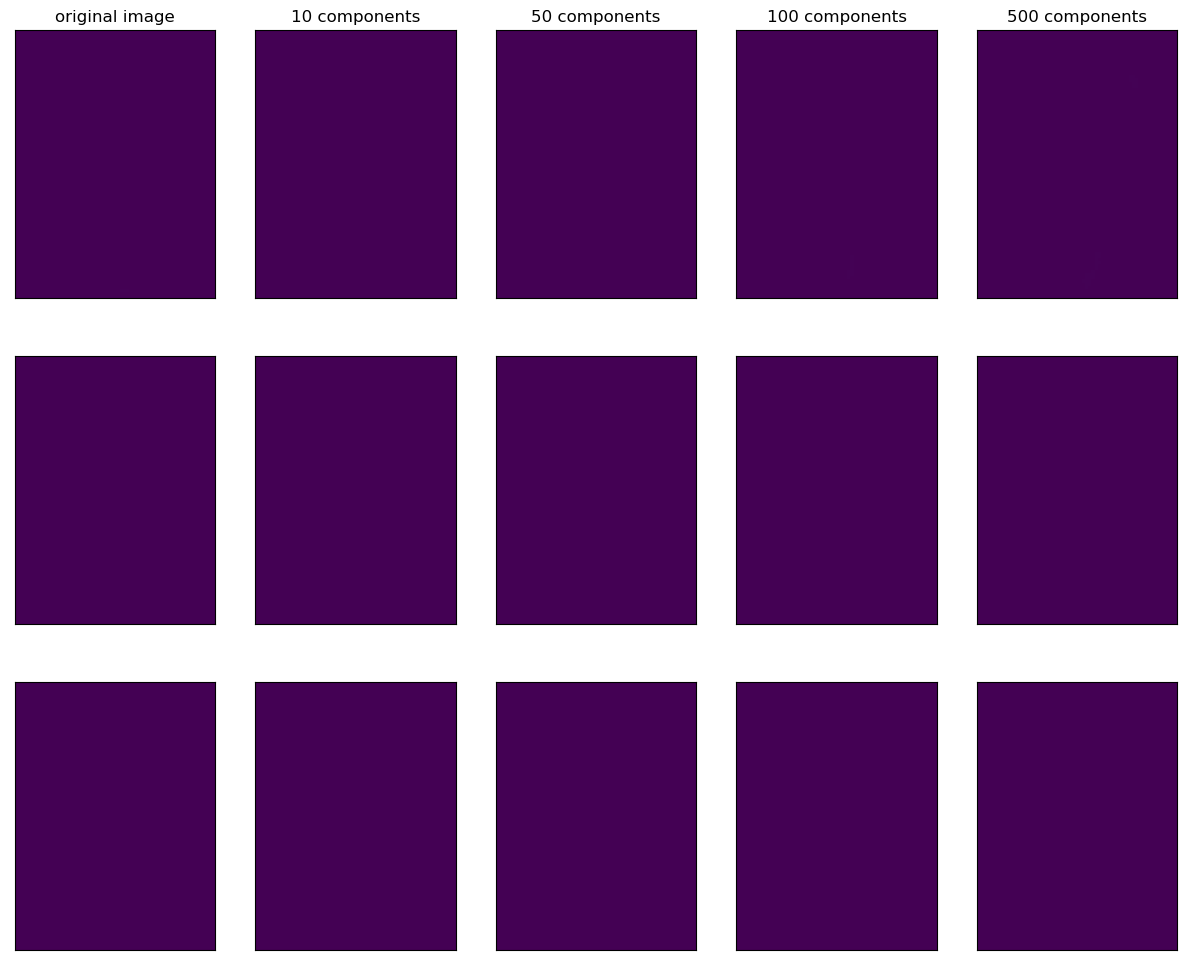

In [42]:
# Code from the previous part to have the necessary variables
from sklearn.datasets import fetch_lfw_people
import numpy as np
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
image_shape = people.images[0].shape

import mglearn
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

**Hình 3-14. Tái tạo ba hình ảnh khuôn mặt bằng cách sử dụng số lượng thành phần tăng dần được tìm thấy bởi NMF**

Chất lượng của dữ liệu được biến đổi ngược lại tương tự như khi sử dụng PCA, nhưng hơi tệ hơn một chút. Điều này là có thể dự đoán được, vì PCA tìm ra các hướng tối ưu về mặt tái tạo. NMF thường không được sử dụng vì khả năng tái tạo hoặc mã hóa dữ liệu, mà là để tìm ra các mẫu thú vị trong dữ liệu.

Để có cái nhìn đầu tiên về dữ liệu, hãy thử trích xuất chỉ một vài thành phần (ví dụ: 15). Hình 3-15 cho thấy kết quả:

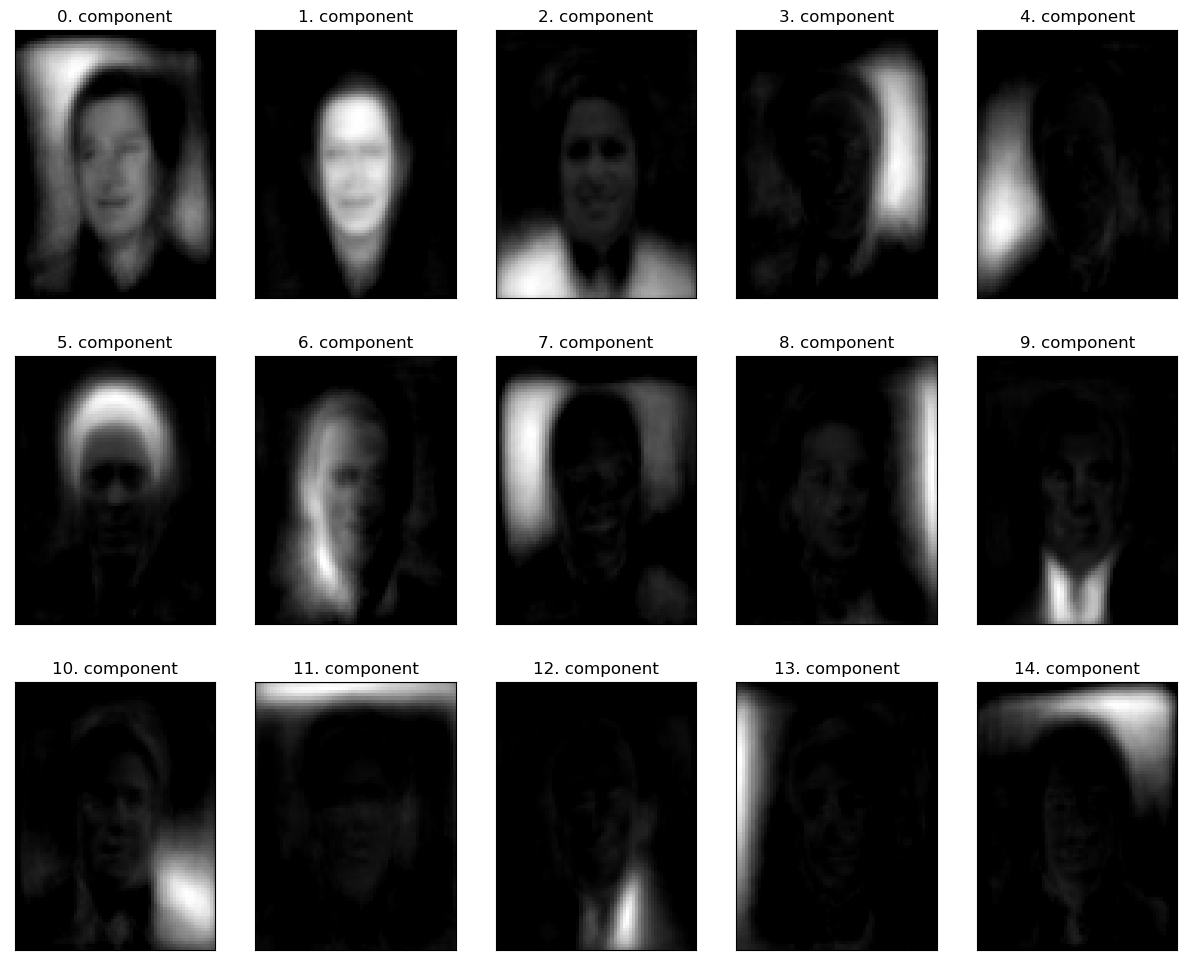

In [43]:
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

nmf = NMF(n_components=15, random_state=0, max_iter=1000, tol=1e-2) # Added max_iter and tol for convergence
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                       subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='gray') # Changed cmap for better visualization
    ax.set_title("{}. component".format(i))
plt.show()

**Hình 3-15. Các thành phần được tìm thấy bởi NMF trên tập dữ liệu khuôn mặt khi sử dụng 15 thành phần**

Các thành phần này đều là dương, và do đó giống với các nguyên mẫu của khuôn mặt hơn nhiều so với các thành phần được hiển thị cho PCA trong Hình 3-9. Ví dụ, người ta có thể thấy rõ rằng thành phần 3 cho thấy một khuôn mặt xoay hơi sang phải, trong khi thành phần 7 cho thấy một khuôn mặt hơi xoay sang trái. Hãy xem các hình ảnh mà các thành phần này đặc biệt mạnh, được hiển thị trong Hình 3-16 và 3-17:

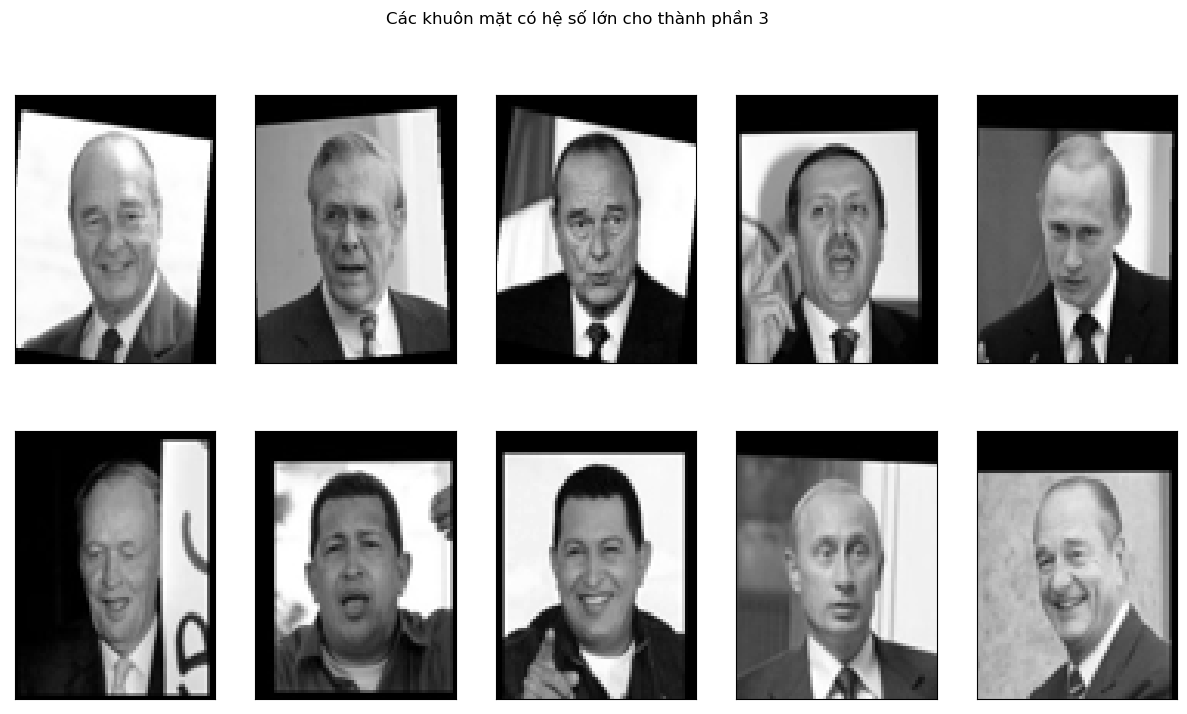

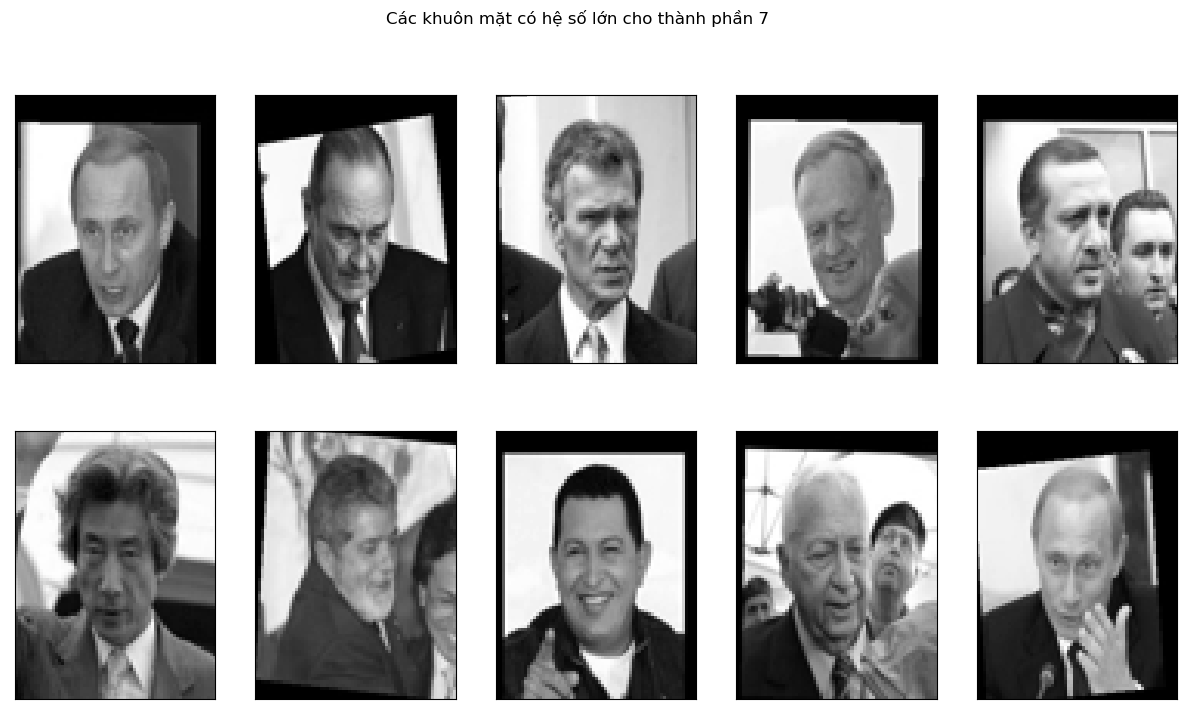

In [44]:
# Hình 3-16
compn = 3
# sắp xếp theo thành phần thứ 3, vẽ 10 hình ảnh đầu tiên
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                       subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Các khuôn mặt có hệ số lớn cho thành phần 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape), cmap='gray')
plt.show()

# Hình 3-17
compn = 7
# sắp xếp theo thành phần thứ 7, vẽ 10 hình ảnh đầu tiên
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                       subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Các khuôn mặt có hệ số lớn cho thành phần 7")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape), cmap='gray')
plt.show()

**Hình 3-16. Các khuôn mặt có hệ số lớn cho thành phần 3**

**Hình 3-17. Các khuôn mặt có hệ số lớn cho thành phần 7**

Như mong đợi, các khuôn mặt có hệ số cao cho thành phần 3 là các khuôn mặt nhìn sang phải (Hình 3-16), trong khi các khuôn mặt có hệ số cao cho thành phần 7 là nhìn sang trái (Hình 3-17). Như đã đề cập trước đó, việc trích xuất các mẫu như thế này hoạt động tốt nhất cho dữ liệu có cấu trúc cộng, bao gồm dữ liệu âm thanh, biểu hiện gen và văn bản. Hãy xem qua một ví dụ trên dữ liệu tổng hợp để xem nó có thể trông như thế nào. Giả sử chúng ta quan tâm đến một tín hiệu là sự kết hợp của ba nguồn khác nhau (Hình 3-18):

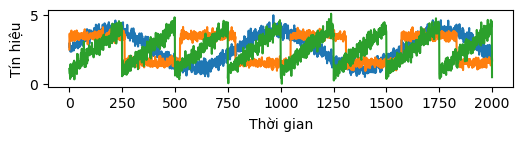

In [45]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Thời gian")
plt.ylabel("Tín hiệu")
plt.show()

**Hình 3-18. Các nguồn tín hiệu gốc**

Thật không may, chúng ta không thể quan sát các tín hiệu gốc, mà chỉ có một hỗn hợp cộng của cả ba tín hiệu. Chúng ta muốn khôi phục lại sự phân rã của tín hiệu hỗn hợp thành các thành phần gốc. Chúng ta giả định rằng chúng ta có nhiều cách khác nhau để quan sát hỗn hợp (giả sử 100 thiết bị đo lường), mỗi thiết bị cung cấp cho chúng ta một chuỗi các phép đo:

In [46]:
# trộn dữ liệu vào một trạng thái 100 chiều
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


Chúng ta có thể sử dụng NMF để khôi phục ba tín hiệu:

In [47]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


Để so sánh, chúng ta cũng áp dụng PCA:

In [48]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

Hình 3-19 cho thấy hoạt động tín hiệu được phát hiện bởi NMF và PCA:

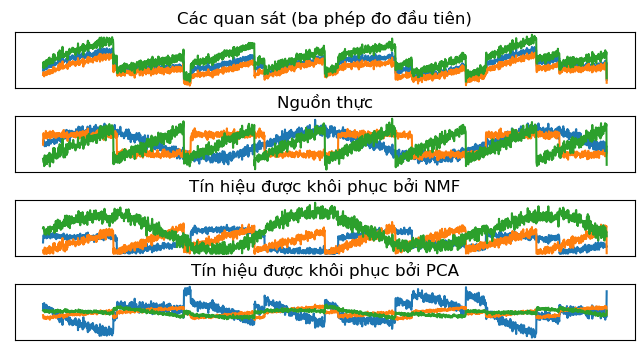

In [49]:
models = [X, S, S_, H]
names = ['Các quan sát (ba phép đo đầu tiên)',
         'Nguồn thực',
         'Tín hiệu được khôi phục bởi NMF',
         'Tín hiệu được khôi phục bởi PCA']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                       subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
plt.show()

**Hình 3-19. Khôi phục các nguồn hỗn hợp bằng NMF và PCA**

Hình vẽ bao gồm 3 trong số 100 phép đo từ X để tham khảo. Như bạn có thể thấy, NMF đã làm khá tốt trong việc khám phá các nguồn gốc, trong khi PCA đã thất bại và sử dụng thành phần đầu tiên để giải thích phần lớn sự biến đổi trong dữ liệu. Hãy nhớ rằng các thành phần được tạo ra bởi NMF không có thứ tự tự nhiên. Trong ví dụ này, thứ tự của các thành phần NMF giống như trong tín hiệu gốc (xem màu của ba đường cong), nhưng điều này hoàn toàn là tình cờ.

Có nhiều thuật toán khác có thể được sử dụng để phân rã mỗi điểm dữ liệu thành một tổng có trọng số của một tập hợp các thành phần cố định, như PCA và NMF đã làm. Thảo luận về tất cả chúng nằm ngoài phạm vi của cuốn sách này, và mô tả các ràng buộc được đặt ra cho các thành phần và hệ số thường liên quan đến lý thuyết xác suất. Nếu bạn quan tâm đến loại trích xuất mẫu này, chúng tôi khuyên bạn nên nghiên cứu các phần của hướng dẫn sử dụng scikit-learn về phân tích thành phần độc lập (ICA), phân tích nhân tố (FA), và mã hóa thưa (học từ điển), tất cả đều có thể tìm thấy trên trang về các phương pháp phân rã.

### Học Đa tạp (Manifold Learning) với t-SNE

Mặc dù PCA thường là một phương pháp tiếp cận đầu tiên tốt để biến đổi dữ liệu của bạn để bạn có thể trực quan hóa nó bằng biểu đồ phân tán, bản chất của phương pháp (áp dụng một phép xoay và sau đó loại bỏ các hướng) giới hạn tính hữu dụng của nó, như chúng ta đã thấy với biểu đồ phân tán của tập dữ liệu Labeled Faces in the Wild. Có một lớp các thuật toán để trực quan hóa được gọi là các thuật toán học đa tạp cho phép các ánh xạ phức tạp hơn nhiều, và thường cung cấp các trực quan hóa tốt hơn. Một thuật toán đặc biệt hữu ích là thuật toán t-SNE.

Các thuật toán học đa tạp chủ yếu nhằm mục đích trực quan hóa, và do đó hiếm khi được sử dụng để tạo ra nhiều hơn hai đặc trưng mới. Một số trong số chúng, bao gồm t-SNE, tính toán một biểu diễn mới của dữ liệu huấn luyện, nhưng không cho phép biến đổi dữ liệu mới. Điều này có nghĩa là các thuật toán này không thể được áp dụng cho một tập kiểm tra: thay vào đó, chúng chỉ có thể biến đổi dữ liệu mà chúng đã được huấn luyện. Học đa tạp có thể hữu ích cho phân tích dữ liệu khám phá, nhưng hiếm khi được sử dụng nếu mục tiêu cuối cùng là học có giám sát.

Ý tưởng đằng sau t-SNE là tìm một biểu diễn hai chiều của dữ liệu mà bảo toàn khoảng cách giữa các điểm một cách tốt nhất có thể. t-SNE bắt đầu với một biểu diễn hai chiều ngẫu nhiên cho mỗi điểm dữ liệu, và sau đó cố gắng làm cho các điểm gần nhau trong không gian đặc trưng ban đầu gần nhau hơn, và các điểm xa nhau trong không gian đặc trưng ban đầu xa nhau hơn. t-SNE nhấn mạnh nhiều hơn vào các điểm gần nhau, thay vì bảo toàn khoảng cách giữa các điểm xa nhau. Nói cách khác, nó cố gắng bảo toàn thông tin cho biết điểm nào là láng giềng của nhau.

Chúng ta sẽ áp dụng thuật toán học đa tạp t-SNE trên một tập dữ liệu chữ số viết tay² được bao gồm trong scikit-learn. Mỗi điểm dữ liệu trong tập dữ liệu này là một hình ảnh thang độ xám 8x8 của một chữ số viết tay từ 0 đến 9. Hình 3-20 cho thấy một hình ảnh ví dụ cho mỗi lớp:

--- 
² Không nên nhầm lẫn với tập dữ liệu MNIST lớn hơn nhiều.

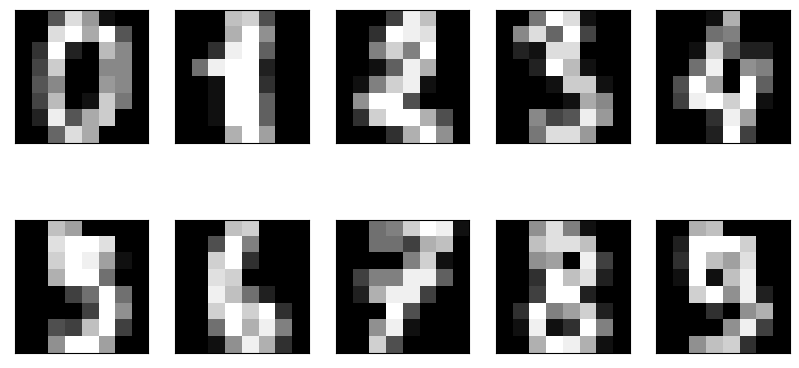

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                       subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap='gray')
plt.show()

**Hình 3-20. Hình ảnh ví dụ từ tập dữ liệu digits**

Hãy sử dụng PCA để trực quan hóa dữ liệu được giảm xuống hai chiều. Chúng ta vẽ hai thành phần chính đầu tiên, và tô màu mỗi chấm theo lớp của nó (xem Hình 3-21):

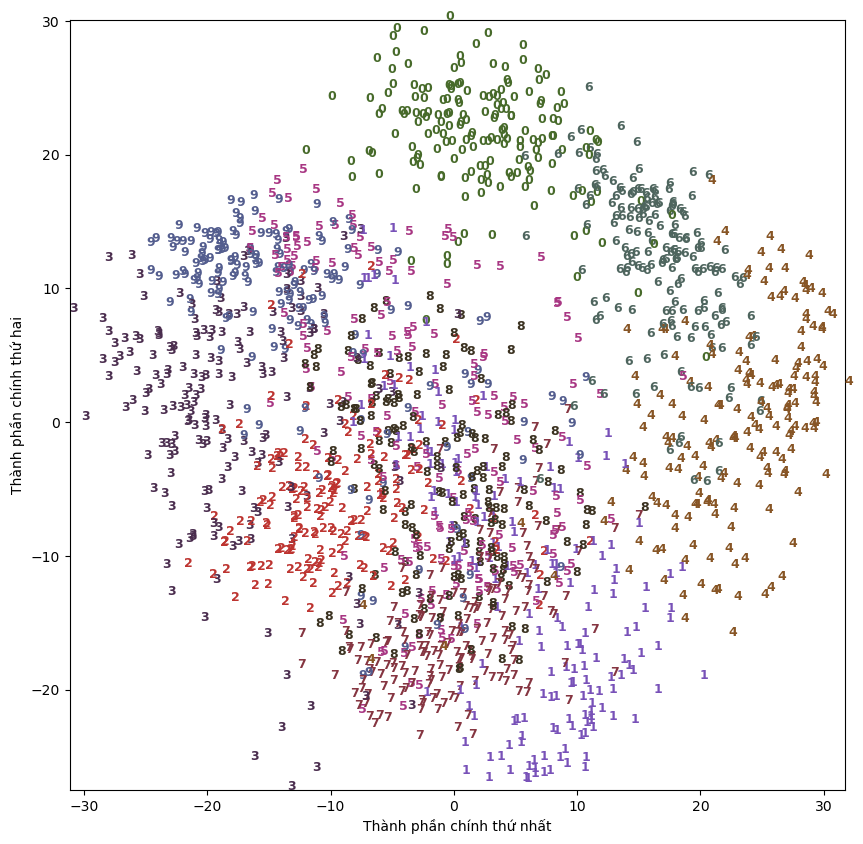

In [51]:
# xây dựng một mô hình PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# biến đổi dữ liệu digits lên hai thành phần chính đầu tiên
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # thực sự vẽ các chữ số dưới dạng văn bản thay vì sử dụng scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("Thành phần chính thứ nhất")
plt.ylabel("Thành phần chính thứ hai")
plt.show()

**Hình 3-21. Biểu đồ phân tán của tập dữ liệu digits sử dụng hai thành phần chính đầu tiên**

Ở đây, chúng ta thực sự đã sử dụng các lớp chữ số thực làm ký tự, để hiển thị lớp nào ở đâu. Các chữ số không, sáu và bốn được phân tách tương đối tốt bằng hai thành phần chính đầu tiên, mặc dù chúng vẫn chồng chéo. Hầu hết các chữ số khác chồng chéo đáng kể.

Hãy áp dụng t-SNE cho cùng một tập dữ liệu, và so sánh kết quả. Vì t-SNE không hỗ trợ biến đổi dữ liệu mới, lớp `TSNE` không có phương thức `transform`. Thay vào đó, chúng ta có thể gọi phương thức `fit_transform`, sẽ xây dựng mô hình và trả về ngay lập tức dữ liệu đã biến đổi (xem Hình 3-22):

In [52]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# sử dụng fit_transform thay vì fit, vì TSNE không có phương thức transform
digits_tsne = tsne.fit_transform(digits.data)

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


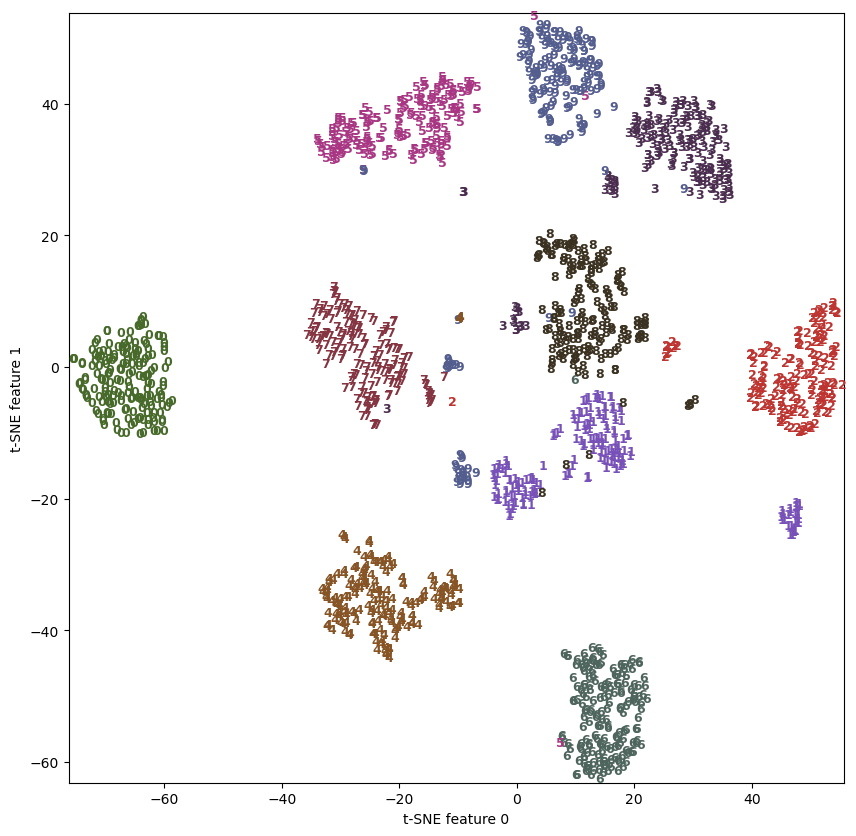

In [53]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # thực sự vẽ các chữ số dưới dạng văn bản thay vì sử dụng scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color=colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1") # Mistake in original book, should be ylabel
plt.show()

**Hình 3-22. Biểu đồ phân tán của tập dữ liệu digits sử dụng hai thành phần được tìm thấy bởi t-SNE**

Kết quả của t-SNE khá đáng chú ý. Tất cả các lớp đều được phân tách khá rõ ràng. Các chữ số một và chín có phần bị chia cắt, nhưng hầu hết các lớp tạo thành một nhóm dày đặc duy nhất. Hãy nhớ rằng phương pháp này không có kiến thức về nhãn lớp: nó hoàn toàn không giám sát. Tuy nhiên, nó có thể tìm thấy một biểu diễn của dữ liệu trong không gian hai chiều mà phân tách rõ ràng các lớp, chỉ dựa trên mức độ gần của các điểm trong không gian ban đầu.

Thuật toán t-SNE có một số tham số điều chỉnh, mặc dù nó thường hoạt động tốt với các cài đặt mặc định. Bạn có thể thử chơi với `perplexity` và `early_exaggeration`, nhưng hiệu ứng thường là nhỏ.

## Phân cụm

Như chúng ta đã mô tả trước đó, phân cụm là nhiệm vụ phân chia tập dữ liệu thành các nhóm, được gọi là các cụm. Mục tiêu là phân chia dữ liệu sao cho các điểm trong một cụm duy nhất rất giống nhau và các điểm trong các cụm khác nhau thì khác nhau. Tương tự như các thuật toán phân loại, các thuật toán phân cụm gán (hoặc dự đoán) một số cho mỗi điểm dữ liệu, cho biết một điểm cụ thể thuộc về cụm nào.

### Phân cụm k-Means

Phân cụm k-means là một trong những thuật toán phân cụm đơn giản và được sử dụng phổ biến nhất. Nó cố gắng tìm các tâm cụm đại diện cho các vùng nhất định của dữ liệu. Thuật toán xen kẽ giữa hai bước: gán mỗi điểm dữ liệu cho tâm cụm gần nhất, và sau đó đặt mỗi tâm cụm là trung bình của các điểm dữ liệu được gán cho nó. Thuật toán kết thúc khi việc gán các thể hiện cho các cụm không còn thay đổi. Ví dụ sau (Hình 3-23) minh họa thuật toán trên một tập dữ liệu tổng hợp:

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning:

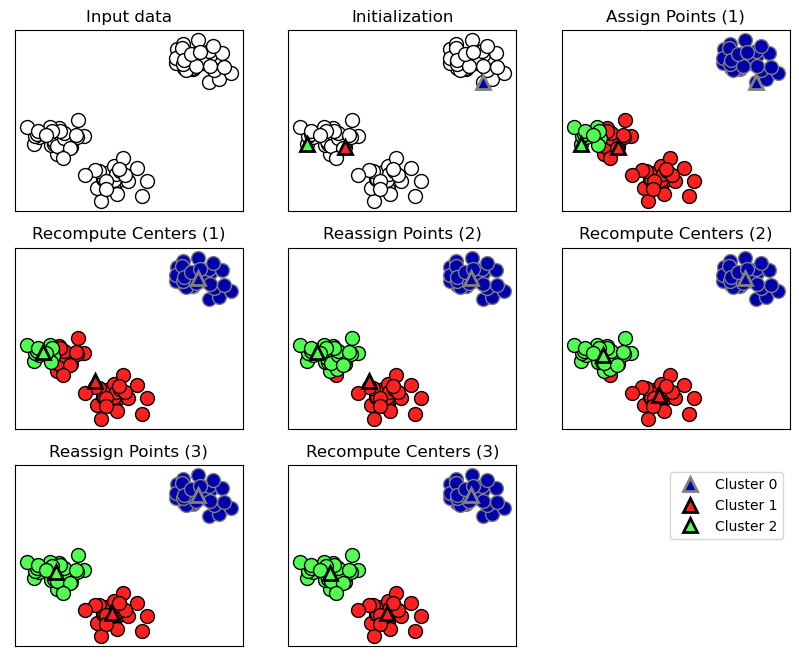

In [54]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

**Hình 3-23. Dữ liệu đầu vào và ba bước của thuật toán k-means**

Các tâm cụm được hiển thị dưới dạng hình tam giác, trong khi các điểm dữ liệu được hiển thị dưới dạng hình tròn. Màu sắc cho biết tư cách thành viên của cụm. Chúng ta đã chỉ định rằng chúng ta đang tìm kiếm ba cụm, vì vậy thuật toán được khởi tạo bằng cách khai báo ngẫu nhiên ba điểm dữ liệu làm tâm cụm (xem "Khởi tạo"). Sau đó, thuật toán lặp bắt đầu. Đầu tiên, mỗi điểm dữ liệu được gán cho tâm cụm gần nhất (xem "Gán điểm (1)"). Tiếp theo, các tâm cụm được cập nhật thành trung bình của các điểm được gán (xem "Tính toán lại tâm (1)"). Sau đó, quá trình được lặp lại thêm hai lần nữa. Sau lần lặp thứ ba, việc gán điểm cho các tâm cụm không thay đổi, vì vậy thuật toán dừng lại.

Với các điểm dữ liệu mới, k-means sẽ gán mỗi điểm cho tâm cụm gần nhất. Ví dụ tiếp theo (Hình 3-24) cho thấy các ranh giới của các tâm cụm đã được học trong Hình 3-23:

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


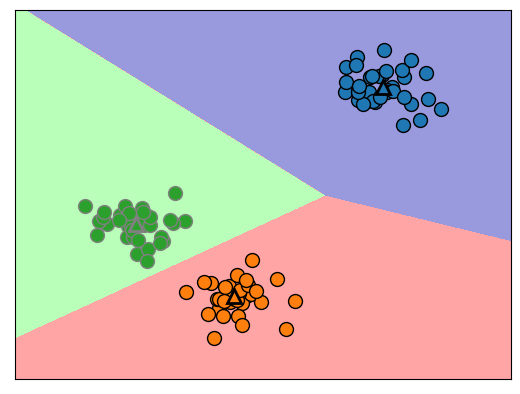

In [55]:
mglearn.plots.plot_kmeans_boundaries()

**Hình 3-24. Các tâm cụm và ranh giới cụm được tìm thấy bởi thuật toán k-means**

Áp dụng k-means với scikit-learn khá đơn giản. Ở đây, chúng ta áp dụng nó cho dữ liệu tổng hợp mà chúng ta đã sử dụng cho các biểu đồ trước đó. Chúng ta khởi tạo lớp `KMeans` và đặt số lượng cụm chúng ta đang tìm kiếm³. Sau đó, chúng ta gọi phương thức `fit` với dữ liệu:

In [56]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# tạo dữ liệu hai chiều tổng hợp
X, y = make_blobs(random_state=1)

# xây dựng mô hình phân cụm
kmeans = KMeans(n_clusters=3, n_init=10) # Set n_init to avoid FutureWarning
kmeans.fit(X)

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

Trong quá trình thuật toán, mỗi điểm dữ liệu huấn luyện trong X được gán một nhãn cụm. Bạn có thể tìm thấy các nhãn này trong thuộc tính `kmeans.labels_`:

In [57]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


Vì chúng ta yêu cầu ba cụm, các cụm được đánh số từ 0 đến 2.

Bạn cũng có thể gán nhãn cụm cho các điểm mới, bằng cách sử dụng phương thức `predict`. Mỗi điểm mới được gán cho tâm cụm gần nhất khi dự đoán, nhưng mô hình hiện có không thay đổi. Chạy `predict` trên tập huấn luyện trả về kết quả giống như `labels_`:

In [58]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


Bạn có thể thấy rằng phân cụm có phần tương tự như phân loại, ở chỗ mỗi mục được gán một nhãn. Tuy nhiên, không có sự thật ngầm định (ground truth), và do đó các nhãn tự chúng không có ý nghĩa tiên nghiệm. Hãy quay lại ví dụ về phân cụm hình ảnh khuôn mặt mà chúng ta đã thảo luận trước đó. Có thể cụm 3 được tìm thấy bởi thuật toán chỉ chứa khuôn mặt của bạn bè Bela của bạn. Tuy nhiên, bạn chỉ có thể biết điều đó sau khi bạn xem các bức ảnh, và con số 3 là tùy ý. Thông tin duy nhất mà thuật toán cung cấp cho bạn là tất cả các khuôn mặt được dán nhãn 3 đều tương tự nhau.

Đối với việc phân cụm mà chúng ta vừa tính toán trên tập dữ liệu đồ chơi hai chiều, điều đó có nghĩa là chúng ta không nên gán bất kỳ ý nghĩa nào cho việc một nhóm được dán nhãn 0 và một nhóm khác được dán nhãn 1. Chạy lại thuật toán có thể dẫn đến một cách đánh số cụm khác do tính chất ngẫu nhiên của việc khởi tạo.

Đây là một biểu đồ của dữ liệu này một lần nữa (Hình 3-25). Các tâm cụm được lưu trữ trong thuộc tính `cluster_centers_`, và chúng ta vẽ chúng dưới dạng hình tam giác:

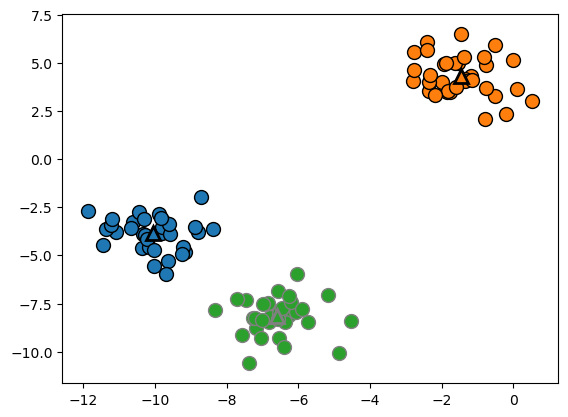

In [59]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.show()

**Hình 3-25. Các gán cụm và tâm cụm được tìm thấy bởi k-means với ba cụm**

Chúng ta cũng có thể sử dụng nhiều hoặc ít tâm cụm hơn (Hình 3-26):

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


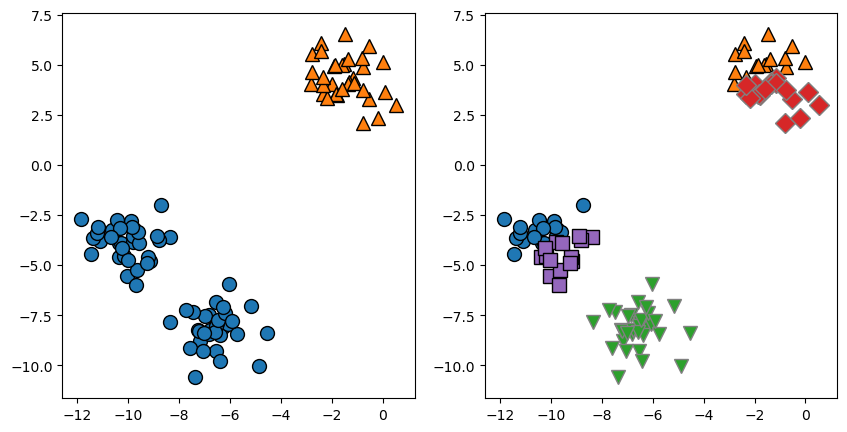

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# sử dụng hai tâm cụm:
kmeans = KMeans(n_clusters=2, n_init=10) # Set n_init to avoid FutureWarning
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# sử dụng năm tâm cụm:
kmeans = KMeans(n_clusters=5, n_init=10) # Set n_init to avoid FutureWarning
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

**Hình 3-26. Các gán cụm được tìm thấy bởi k-means sử dụng hai cụm (trái) và năm cụm (phải)**

#### Các trường hợp thất bại của k-means

Ngay cả khi bạn biết số lượng cụm "đúng" cho một tập dữ liệu nhất định, k-means có thể không phải lúc nào cũng có thể khôi phục chúng. Mỗi cụm được xác định duy nhất bởi tâm của nó, điều này có nghĩa là mỗi cụm là một hình lồi. Do đó, k-means chỉ có thể nắm bắt các hình dạng tương đối đơn giản. k-means cũng giả định rằng tất cả các cụm có cùng "đường kính" theo một nghĩa nào đó; nó luôn vẽ ranh giới giữa các cụm chính xác ở giữa các tâm cụm. Điều đó đôi khi có thể dẫn đến những kết quả đáng ngạc nhiên, như được hiển thị trong Hình 3-27:

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


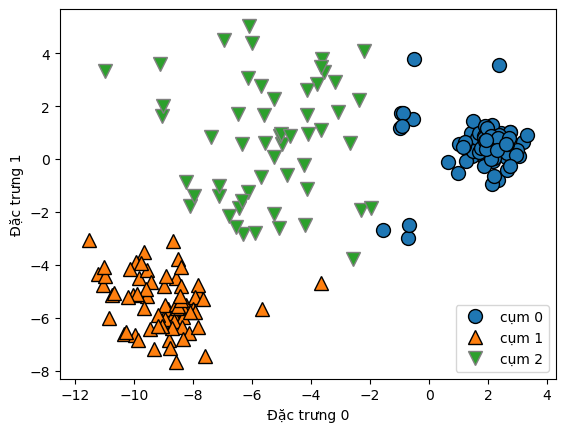

In [61]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0, n_init=10).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cụm 0", "cụm 1", "cụm 2"], loc='best')
plt.xlabel("Đặc trưng 0")
plt.ylabel("Đặc trưng 1")
plt.show()

**Hình 3-27. Các gán cụm được tìm thấy bởi k-means khi các cụm có mật độ khác nhau**

Người ta có thể đã mong đợi vùng dày đặc ở phía dưới bên trái là cụm thứ nhất, vùng dày đặc ở phía trên bên phải là cụm thứ hai, và vùng ít dày đặc hơn ở trung tâm là cụm thứ ba. Thay vào đó, cả cụm 0 và cụm 1 đều có một số điểm ở xa tất cả các điểm khác trong các cụm này mà "vươn" về phía trung tâm.

k-means cũng giả định rằng tất cả các hướng đều quan trọng như nhau đối với mỗi cụm. Biểu đồ sau (Hình 3-28) cho thấy một tập dữ liệu hai chiều nơi có ba phần được phân tách rõ ràng trong dữ liệu. Tuy nhiên, các nhóm này bị kéo dài về phía đường chéo. Vì k-means chỉ xem xét khoảng cách đến tâm cụm gần nhất, nó không thể xử lý loại dữ liệu này:

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


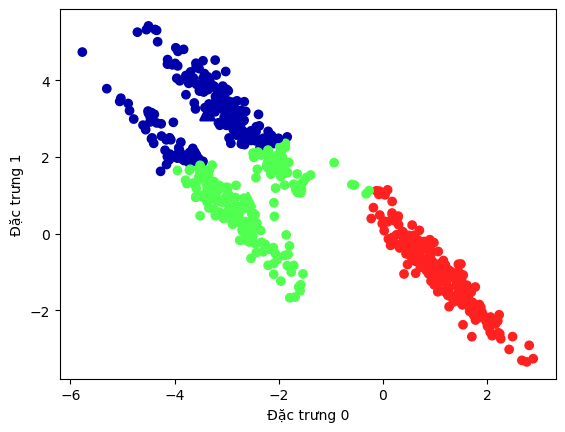

In [62]:
import numpy as np

# tạo một số dữ liệu cụm ngẫu nhiên
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# biến đổi dữ liệu để bị kéo dài
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# phân cụm dữ liệu thành ba cụm
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# vẽ các gán cụm và tâm cụm
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Đặc trưng 0")
plt.ylabel("Đặc trưng 1")
plt.show()

**Hình 3-28. k-means thất bại trong việc xác định các cụm không có dạng hình cầu**

k-means cũng hoạt động kém nếu các cụm có hình dạng phức tạp hơn, như dữ liệu two_moons mà chúng ta đã gặp trong Chương 2 (xem Hình 3-29):

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


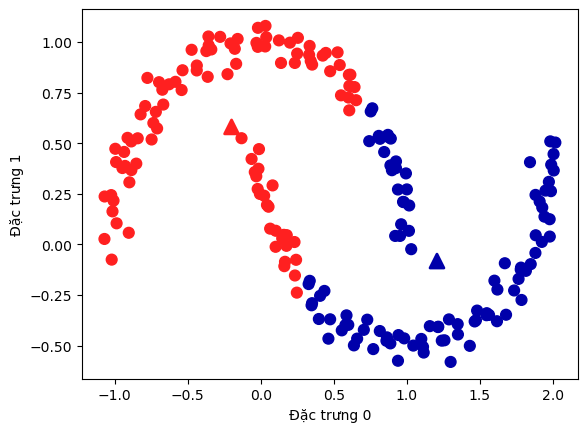

In [63]:
# tạo dữ liệu two_moons tổng hợp (lần này có ít nhiễu hơn)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# phân cụm dữ liệu thành hai cụm
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# vẽ các gán cụm và tâm cụm
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Đặc trưng 0")
plt.ylabel("Đặc trưng 1")
plt.show()

**Hình 3-29. k-means thất bại trong việc xác định các cụm có hình dạng phức tạp**

Ở đây, chúng ta hy vọng rằng thuật toán phân cụm có thể khám phá ra hai hình nửa vầng trăng. Tuy nhiên, điều này không thể thực hiện được bằng thuật toán k-means.

#### Lượng tử hóa vector, hay xem k-means như là một phương pháp phân rã

Mặc dù k-means là một thuật toán phân cụm, có những điểm tương đồng thú vị giữa k-means và các phương pháp phân rã như PCA và NMF mà chúng ta đã thảo luận trước đó. Bạn có thể nhớ rằng PCA cố gắng tìm các hướng có phương sai lớn nhất trong dữ liệu, trong khi NMF cố gắng tìm các thành phần cộng, thường tương ứng với các "cực" hoặc "phần" của dữ liệu (xem Hình 3-13). Cả hai phương pháp đều cố gắng biểu diễn các điểm dữ liệu dưới dạng tổng của một số thành phần. Mặt khác, k-means cố gắng biểu diễn mỗi điểm dữ liệu bằng một tâm cụm. Bạn có thể nghĩ rằng mỗi điểm được biểu diễn chỉ bằng một thành phần duy nhất, được cho bởi tâm cụm. Quan điểm này của k-means như một phương pháp phân rã, trong đó mỗi điểm được biểu diễn bằng một thành phần duy nhất, được gọi là lượng tử hóa vector.

Hãy thực hiện một so sánh song song giữa PCA, NMF và k-means, hiển thị các thành phần được trích xuất (Hình 3-30), cũng như các tái tạo của các khuôn mặt từ tập kiểm tra sử dụng 100 thành phần (Hình 3-31). Đối với k-means, việc tái tạo là tâm cụm gần nhất được tìm thấy trên tập huấn luyện:

In [64]:
# Code from the previous part to have the necessary variables
from sklearn.datasets import fetch_lfw_people
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.
image_shape = people.images[0].shape
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

# Actual code for this section
nmf = NMF(n_components=100, random_state=0, max_iter=1000, tol=1e-2)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0, n_init=10)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


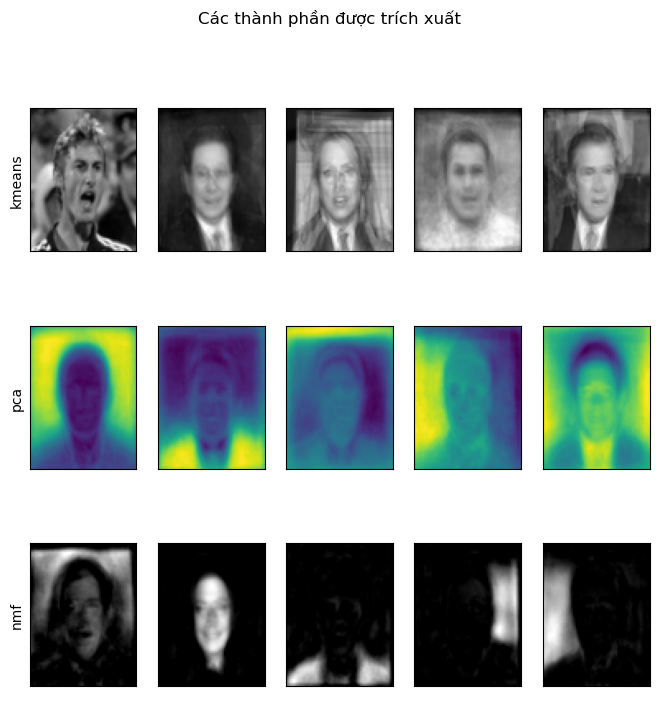

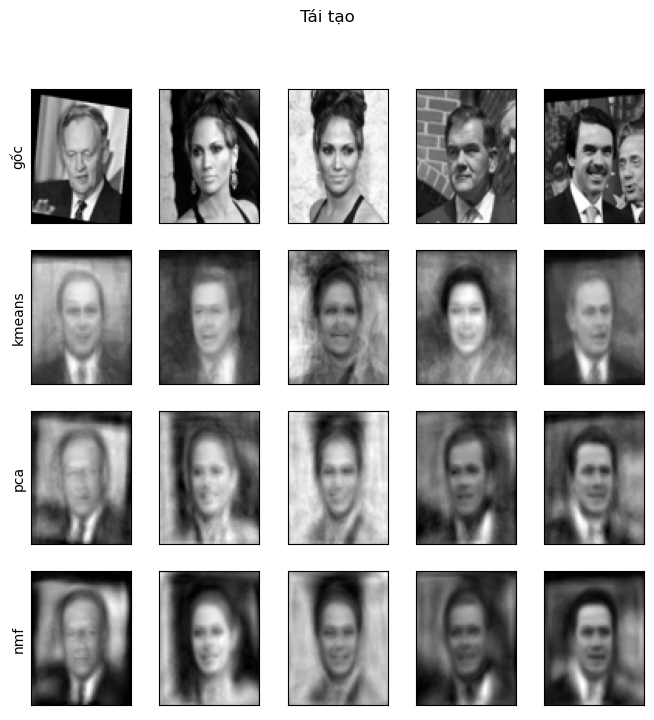

In [65]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                       subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Các thành phần được trích xuất")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape), cmap='gray')
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape), cmap='gray')

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
plt.show()

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                       figsize=(8, 8))
fig.suptitle("Tái tạo")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
    X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape), cmap='gray')
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap='gray')
    ax[2].imshow(rec_pca.reshape(image_shape), cmap='gray')
    ax[3].imshow(rec_nmf.reshape(image_shape), cmap='gray')

axes[0, 0].set_ylabel("gốc")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")
plt.show()

**Hình 3-30. So sánh các tâm cụm k-means với các thành phần được tìm thấy bởi PCA và NMF**

**Hình 3-31. So sánh tái tạo hình ảnh bằng k-means, PCA, và NMF với 100 thành phần (hoặc tâm cụm)—k-means chỉ sử dụng một tâm cụm duy nhất cho mỗi hình ảnh**

Một khía cạnh thú vị của lượng tử hóa vector bằng k-means là chúng ta có thể sử dụng nhiều cụm hơn so với số chiều đầu vào để mã hóa dữ liệu. Hãy quay lại dữ liệu `two_moons`. Sử dụng PCA hoặc NMF, chúng ta không thể làm gì nhiều với dữ liệu này, vì nó chỉ tồn tại trong hai chiều. Giảm nó xuống một chiều bằng PCA hoặc NMF sẽ phá hủy hoàn toàn cấu trúc của dữ liệu. Nhưng chúng ta có thể tìm thấy một biểu diễn biểu cảm hơn với k-means, bằng cách sử dụng nhiều tâm cụm hơn (xem Hình 3-32):

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


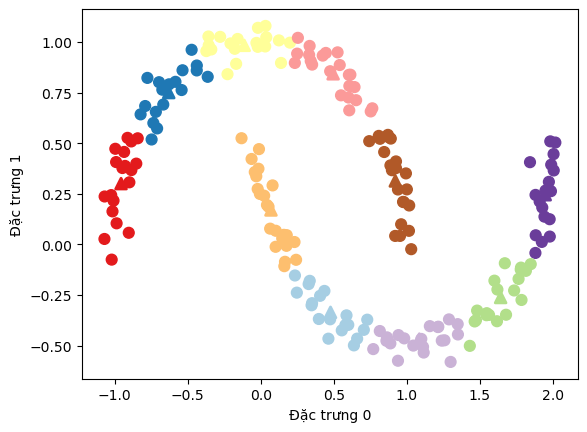

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


In [66]:
from sklearn.datasets import make_moons
import mglearn

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Đặc trưng 0")
plt.ylabel("Đặc trưng 1")
plt.show()
print("Cluster memberships:\n{}".format(y_pred))

**Hình 3-32. Sử dụng nhiều cụm k-means để bao phủ sự biến thiên trong một tập dữ liệu phức tạp**

Chúng ta đã sử dụng 10 tâm cụm, điều này có nghĩa là mỗi điểm bây giờ được gán một số từ 0 đến 9. Chúng ta có thể xem đây là dữ liệu được biểu diễn bằng 10 thành phần (tức là, chúng ta có 10 đặc trưng mới), với tất cả các đặc trưng đều bằng 0, ngoại trừ đặc trưng đại diện cho tâm cụm mà điểm đó được gán vào. Sử dụng biểu diễn 10 chiều này, bây giờ có thể tách hai hình nửa vầng trăng bằng một mô hình tuyến tính, điều mà không thể thực hiện được bằng hai đặc trưng ban đầu. Cũng có thể có được một biểu diễn biểu cảm hơn của dữ liệu bằng cách sử dụng khoảng cách đến mỗi tâm cụm làm đặc trưng. Điều này có thể được thực hiện bằng cách sử dụng phương thức `transform` của `kmeans`:

In [67]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


k-means là một thuật toán rất phổ biến để phân cụm, không chỉ vì nó tương đối dễ hiểu và dễ triển khai, mà còn vì nó chạy tương đối nhanh. k-means dễ dàng mở rộng cho các tập dữ liệu lớn, và scikit-learn thậm chí còn bao gồm một biến thể có khả năng mở rộng hơn trong lớp `MiniBatchKMeans`, có thể xử lý các tập dữ liệu rất lớn.

Một trong những nhược điểm của k-means là nó dựa vào một khởi tạo ngẫu nhiên, điều này có nghĩa là kết quả của thuật toán phụ thuộc vào một hạt giống ngẫu nhiên. Theo mặc định, scikit-learn chạy thuật toán 10 lần với 10 khởi tạo ngẫu nhiên khác nhau, và trả về kết quả tốt nhất⁴.

Những nhược điểm khác của k-means là các giả định tương đối hạn chế về hình dạng của các cụm, và yêu cầu phải chỉ định số lượng cụm bạn đang tìm kiếm (có thể không được biết trong một ứng dụng thực tế). Tiếp theo, chúng ta sẽ xem xét hai thuật toán phân cụm khác cải thiện những thuộc tính này theo một số cách.

--- 
⁴ Trong trường hợp này, "tốt nhất" có nghĩa là tổng phương sai của các cụm là nhỏ.

### Phân cụm Gộp (Agglomerative Clustering)

Phân cụm gộp đề cập đến một tập hợp các thuật toán phân cụm đều được xây dựng dựa trên cùng một nguyên tắc: thuật toán bắt đầu bằng cách tuyên bố mỗi điểm là một cụm riêng, sau đó hợp nhất hai cụm giống nhau nhất cho đến khi một tiêu chí dừng nào đó được thỏa mãn. Tiêu chí dừng được triển khai trong scikit-learn là số lượng cụm, vì vậy các cụm tương tự được hợp nhất cho đến khi chỉ còn lại số lượng cụm được chỉ định. Có một số tiêu chí liên kết (linkage criteria) chỉ định chính xác cách đo lường "cụm giống nhau nhất". Phép đo này luôn được xác định giữa hai cụm hiện có.

Ba lựa chọn sau đây được triển khai trong scikit-learn:

**ward**
Lựa chọn mặc định, `ward` chọn hai cụm để hợp nhất sao cho phương sai trong tất cả các cụm tăng ít nhất. Điều này thường dẫn đến các cụm có kích thước tương đối bằng nhau.

**average**
Liên kết `average` hợp nhất hai cụm có khoảng cách trung bình nhỏ nhất giữa tất cả các điểm của chúng.

**complete**
Liên kết `complete` (còn được gọi là liên kết tối đa) hợp nhất hai cụm có khoảng cách tối đa nhỏ nhất giữa các điểm của chúng.

`ward` hoạt động trên hầu hết các tập dữ liệu, và chúng ta sẽ sử dụng nó trong các ví dụ của mình. Nếu các cụm có số lượng thành viên rất khác nhau (ví dụ, nếu một cụm lớn hơn nhiều so với tất cả các cụm khác), `average` hoặc `complete` có thể hoạt động tốt hơn.

Biểu đồ sau (Hình 3-33) minh họa quá trình tiến triển của phân cụm gộp trên một tập dữ liệu hai chiều, tìm kiếm ba cụm:

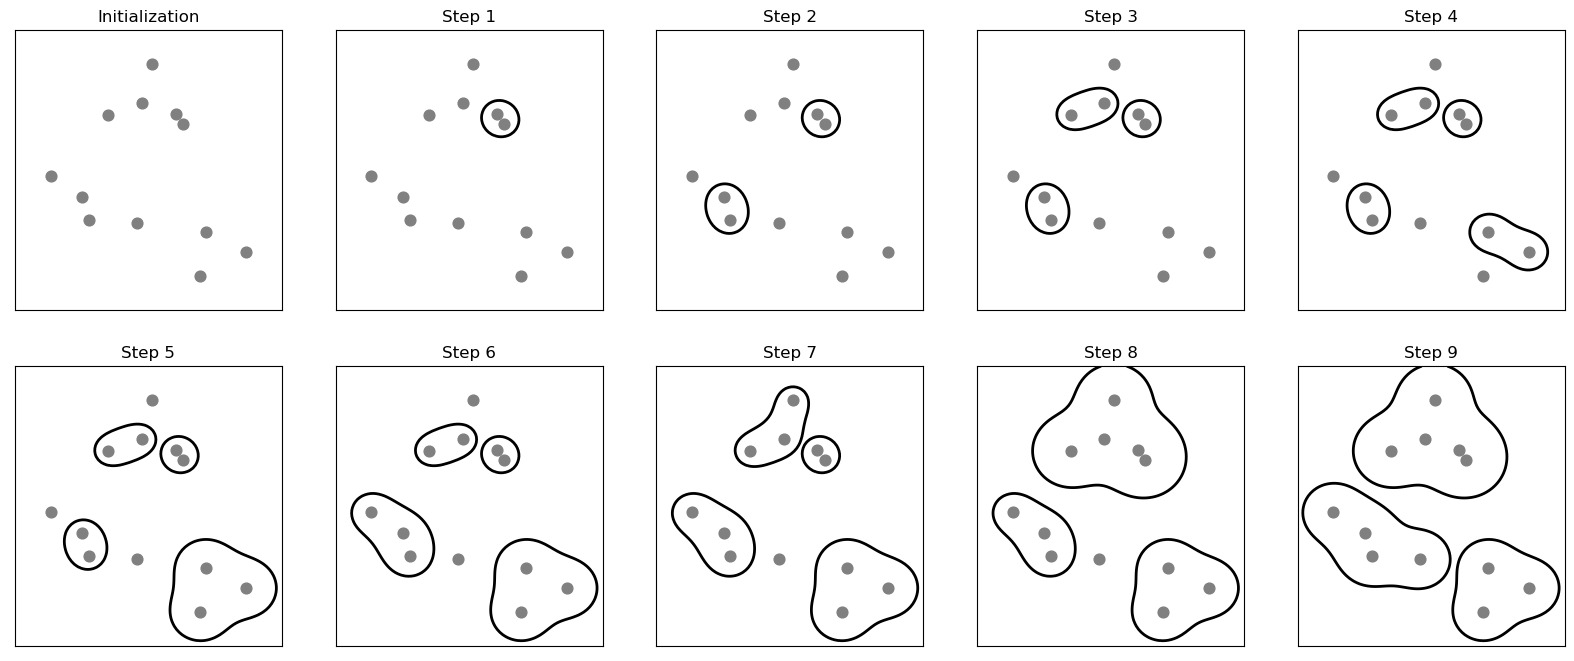

In [68]:
mglearn.plots.plot_agglomerative_algorithm()

**Hình 3-33. Phân cụm gộp lặp đi lặp lại việc kết hợp hai cụm gần nhất**

Ban đầu, mỗi điểm là một cụm riêng. Sau đó, trong mỗi bước, hai cụm gần nhất được hợp nhất. Trong bốn bước đầu tiên, hai cụm một điểm được chọn và chúng được nối thành các cụm hai điểm. Ở bước 5, một trong các cụm hai điểm được mở rộng thành điểm thứ ba, và cứ thế. Ở bước 9, chỉ còn lại ba cụm. Vì chúng ta đã chỉ định rằng chúng ta đang tìm kiếm ba cụm, thuật toán sau đó dừng lại.

Hãy xem phân cụm gộp hoạt động như thế nào trên dữ liệu ba cụm đơn giản mà chúng ta đã sử dụng ở đây. Do cách thuật toán hoạt động, phân cụm gộp không thể đưa ra dự đoán cho các điểm dữ liệu mới. Do đó, `AgglomerativeClustering` không có phương thức `predict`. Để xây dựng mô hình và nhận tư cách thành viên cụm trên tập huấn luyện, hãy sử dụng phương thức `fit_predict` thay thế. Kết quả được hiển thị trong Hình 3-34:

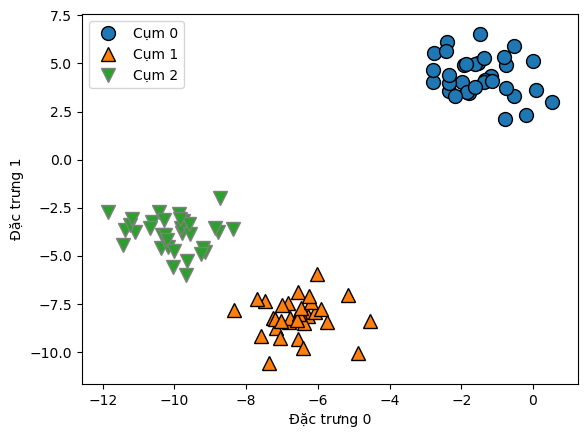

In [69]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Đặc trưng 0")
plt.ylabel("Đặc trưng 1")
plt.legend(["Cụm 0", "Cụm 1", "Cụm 2"])
plt.show()

**Hình 3-34. Gán cụm bằng phân cụm gộp với ba cụm**

Như mong đợi, thuật toán khôi phục phân cụm một cách hoàn hảo. Mặc dù việc triển khai phân cụm gộp của scikit-learn yêu cầu bạn chỉ định số lượng cụm bạn muốn thuật toán tìm, các phương pháp phân cụm gộp cung cấp một số trợ giúp trong việc chọn đúng số lượng, mà chúng ta sẽ thảo luận tiếp theo.

#### Phân cụm phân cấp và biểu đồ cây (dendrogram)

Phân cụm gộp tạo ra cái được gọi là phân cụm phân cấp. Quá trình phân cụm tiến hành lặp đi lặp lại, và mỗi điểm thực hiện một hành trình từ việc là một cụm một điểm đến việc thuộc về một cụm cuối cùng nào đó. Mỗi bước trung gian cung cấp một phân cụm của dữ liệu (với một số lượng cụm khác nhau). Đôi khi hữu ích khi xem xét tất cả các phân cụm có thể có cùng nhau. Ví dụ tiếp theo (Hình 3-35) cho thấy một sự chồng chéo của tất cả các phân cụm có thể có được hiển thị trong Hình 3-33, cung cấp một số cái nhìn sâu sắc về cách mỗi cụm chia nhỏ thành các cụm nhỏ hơn:

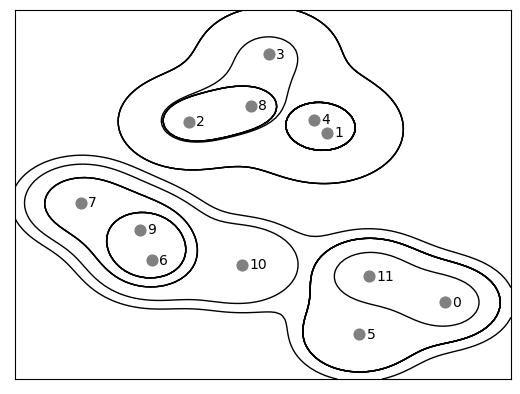

In [70]:
mglearn.plots.plot_agglomerative()

**Hình 3-35. Gán cụm phân cấp (hiển thị dưới dạng các đường) được tạo ra bằng phân cụm gộp, với các điểm dữ liệu được đánh số (xem Hình 3-36)**

Mặc dù trực quan hóa này cung cấp một cái nhìn rất chi tiết về phân cụm phân cấp, nó phụ thuộc vào bản chất hai chiều của dữ liệu và do đó không thể được sử dụng trên các tập dữ liệu có nhiều hơn hai đặc trưng. Tuy nhiên, có một công cụ khác để trực quan hóa phân cụm phân cấp, được gọi là biểu đồ cây (dendrogram), có thể xử lý các tập dữ liệu đa chiều.

Thật không may, scikit-learn hiện tại không có chức năng vẽ biểu đồ cây. Tuy nhiên, bạn có thể tạo chúng dễ dàng bằng cách sử dụng SciPy. Các thuật toán phân cụm của SciPy có giao diện hơi khác so với các thuật toán phân cụm của scikit-learn. SciPy cung cấp một hàm nhận một mảng dữ liệu X và tính toán một mảng liên kết (linkage array), mã hóa sự tương đồng của cụm phân cấp. Sau đó, chúng ta có thể đưa mảng liên kết này vào hàm `dendrogram` của SciPy để vẽ biểu đồ cây (Hình 3-36):

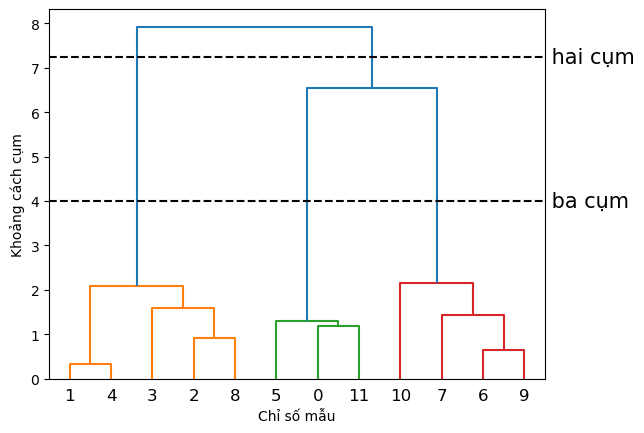

In [71]:
# Import hàm dendrogram và hàm phân cụm ward từ SciPy
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)
# Áp dụng phân cụm ward cho mảng dữ liệu X
# Hàm ward của SciPy trả về một mảng chỉ định các khoảng cách
# được bắc cầu khi thực hiện phân cụm gộp
linkage_array = ward(X)
# Bây giờ chúng ta vẽ biểu đồ cây cho linkage_array chứa các khoảng cách
# giữa các cụm
dendrogram(linkage_array)

# Đánh dấu các vết cắt trong cây biểu thị hai hoặc ba cụm
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' hai cụm', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' ba cụm', va='center', fontdict={'size': 15})
plt.xlabel("Chỉ số mẫu")
plt.ylabel("Khoảng cách cụm")
plt.show()

**Hình 3-36. Biểu đồ cây của phân cụm được hiển thị trong Hình 3-35 với các đường chỉ ra sự phân chia thành hai và ba cụm**

Biểu đồ cây hiển thị các điểm dữ liệu dưới dạng các điểm ở dưới cùng (được đánh số từ 0 đến 11). Sau đó, một cây được vẽ với các điểm này (đại diện cho các cụm một điểm) là các lá, và một nút cha mới được thêm vào cho mỗi hai cụm được nối. Đọc từ dưới lên trên, các điểm dữ liệu 1 và 4 được nối đầu tiên (như bạn có thể thấy trong Hình 3-33). Tiếp theo, các điểm 6 và 9 được nối thành một cụm, và cứ thế. Ở cấp cao nhất, có hai nhánh, một nhánh bao gồm các điểm 11, 0, 5, 10, 7, 6, và 9, và nhánh kia bao gồm các điểm 1, 4, 3, 2, và 8. Chúng tương ứng với hai cụm lớn nhất ở phía bên trái của biểu đồ.

Trục y trong biểu đồ cây không chỉ chỉ định khi nào trong thuật toán gộp hai cụm được hợp nhất. Độ dài của mỗi nhánh cũng cho thấy hai cụm được hợp nhất cách nhau bao xa. Các nhánh dài nhất trong biểu đồ cây này là ba đường được đánh dấu bằng đường đứt nét có nhãn "ba cụm". Việc đây là các nhánh dài nhất cho thấy rằng việc đi từ ba đến hai cụm có nghĩa là hợp nhất một số điểm rất xa nhau. Chúng ta thấy điều này một lần nữa ở đầu biểu đồ, nơi việc hợp nhất hai cụm còn lại thành một cụm duy nhất lại bắc cầu một khoảng cách tương đối lớn.

Thật không may, phân cụm gộp vẫn thất bại trong việc tách các hình dạng phức tạp như tập dữ liệu `two_moons`. Nhưng điều tương tự không đúng với thuật toán tiếp theo mà chúng ta sẽ xem xét, DBSCAN.

### DBSCAN

Một thuật toán phân cụm rất hữu ích khác là DBSCAN (viết tắt của "density-based spatial clustering of applications with noise" - phân cụm không gian dựa trên mật độ của các ứng dụng có nhiễu). Lợi ích chính của DBSCAN là nó không yêu cầu người dùng đặt trước số lượng cụm, nó có thể nắm bắt các cụm có hình dạng phức tạp, và nó có thể xác định các điểm không thuộc bất kỳ cụm nào. DBSCAN chậm hơn một chút so với phân cụm gộp và k-means, nhưng vẫn có thể mở rộng cho các tập dữ liệu tương đối lớn.

DBSCAN hoạt động bằng cách xác định các điểm nằm trong các vùng "đông đúc" của không gian đặc trưng, nơi có nhiều điểm dữ liệu gần nhau. Những vùng này được gọi là các vùng dày đặc trong không gian đặc trưng. Ý tưởng đằng sau DBSCAN là các cụm hình thành các vùng dữ liệu dày đặc, được ngăn cách bởi các vùng tương đối trống rỗng.

Các điểm nằm trong một vùng dày đặc được gọi là các mẫu lõi (hoặc điểm lõi), và chúng được định nghĩa như sau. Có hai tham số trong DBSCAN: `min_samples` và `eps`. Nếu có ít nhất `min_samples` điểm dữ liệu trong khoảng cách `eps` đến một điểm dữ liệu nhất định, điểm dữ liệu đó được phân loại là một mẫu lõi. Các mẫu lõi gần nhau hơn khoảng cách `eps` được DBSCAN đặt vào cùng một cụm.

Thuật toán hoạt động bằng cách chọn một điểm tùy ý để bắt đầu. Sau đó, nó tìm tất cả các điểm có khoảng cách `eps` hoặc nhỏ hơn từ điểm đó. Nếu có ít hơn `min_samples` điểm trong khoảng cách `eps` của điểm bắt đầu, điểm này được gắn nhãn là nhiễu, có nghĩa là nó không thuộc bất kỳ cụm nào. Nếu có nhiều hơn `min_samples` điểm trong khoảng cách `eps`, điểm đó được gắn nhãn là một mẫu lõi và được gán một nhãn cụm mới. Sau đó, tất cả các láng giềng (trong phạm vi `eps`) của điểm được duyệt qua. Nếu chúng chưa được gán một cụm, chúng được gán nhãn cụm mới vừa được tạo. Nếu chúng là các mẫu lõi, các láng giềng của chúng lần lượt được duyệt qua, và cứ thế. Cụm phát triển cho đến khi không còn mẫu lõi nào trong khoảng cách `eps` của cụm. Sau đó, một điểm khác chưa được duyệt qua được chọn, và quy trình tương tự được lặp lại.

Cuối cùng, có ba loại điểm: điểm lõi, điểm nằm trong khoảng cách `eps` của điểm lõi (gọi là điểm biên), và nhiễu. Khi thuật toán DBSCAN được chạy trên một tập dữ liệu cụ thể nhiều lần, việc phân cụm các điểm lõi luôn giống nhau, và các điểm giống nhau sẽ luôn được gắn nhãn là nhiễu. Tuy nhiên, một điểm biên có thể là láng giềng của các mẫu lõi của nhiều hơn một cụm. Do đó, tư cách thành viên cụm của các điểm biên phụ thuộc vào thứ tự các điểm được duyệt qua. Thường chỉ có ít điểm biên, và sự phụ thuộc nhỏ này vào thứ tự các điểm không quan trọng.

Hãy áp dụng DBSCAN trên tập dữ liệu tổng hợp mà chúng ta đã sử dụng để minh họa phân cụm gộp. Giống như phân cụm gộp, DBSCAN không cho phép dự đoán trên dữ liệu kiểm tra mới, vì vậy chúng ta sẽ sử dụng phương thức `fit_predict` để thực hiện phân cụm và trả về các nhãn cụm trong một bước:

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Như bạn có thể thấy, tất cả các điểm dữ liệu đều được gán nhãn -1, có nghĩa là nhiễu. Đây là hệ quả của các cài đặt tham số mặc định cho `eps` và `min_samples`, không được điều chỉnh cho các tập dữ liệu đồ chơi nhỏ. Các gán cụm cho các giá trị khác nhau của `min_samples` và `eps` được hiển thị bên dưới, và được trực quan hóa trong Hình 3-37:

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


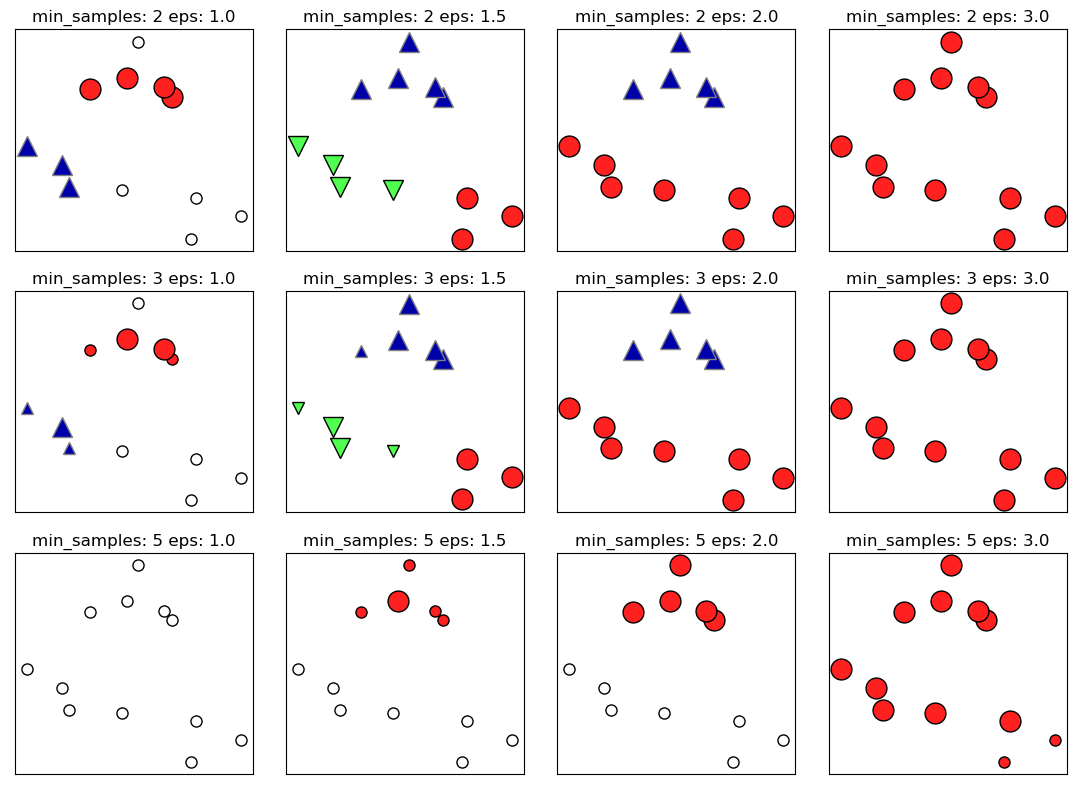

In [73]:
import mglearn
mglearn.plots.plot_dbscan()

**Hình 3-37. Các gán cụm được tìm thấy bởi DBSCAN với các cài đặt thay đổi cho các tham số `min_samples` và `eps`**

Trong biểu đồ này, các điểm thuộc về các cụm là liền khối, trong khi các điểm nhiễu được hiển thị màu trắng. Các mẫu lõi được hiển thị dưới dạng các dấu lớn, trong khi các điểm biên được hiển thị dưới dạng các dấu nhỏ hơn. Tăng `eps` (đi từ trái sang phải trong hình) có nghĩa là nhiều điểm hơn sẽ được bao gồm trong một cụm. Điều này làm cho các cụm phát triển, nhưng cũng có thể dẫn đến việc nhiều cụm hợp nhất thành một. Tăng `min_samples` (đi từ trên xuống dưới trong hình) có nghĩa là ít điểm hơn sẽ là điểm lõi, và nhiều điểm hơn sẽ được gắn nhãn là nhiễu.

Tham số `eps` quan trọng hơn một chút, vì nó xác định ý nghĩa của việc các điểm "gần nhau". Đặt `eps` rất nhỏ sẽ có nghĩa là không có điểm nào là mẫu lõi, và có thể dẫn đến tất cả các điểm được gắn nhãn là nhiễu. Đặt `eps` rất lớn sẽ dẫn đến tất cả các điểm tạo thành một cụm duy nhất. Cài đặt `min_samples` chủ yếu xác định xem các điểm trong các vùng ít dày đặc hơn sẽ được gắn nhãn là ngoại lai hay là các cụm riêng của chúng. Nếu bạn giảm `min_samples`, bất cứ thứ gì đã là một cụm với ít hơn `min_samples` mẫu bây giờ sẽ được gắn nhãn là nhiễu. Do đó, `min_samples` xác định kích thước cụm tối thiểu. Bạn có thể thấy điều này rất rõ ràng trong Hình 3-37, khi đi từ `min_samples=3` đến `min_samples=5` với `eps=1.5`. Với `min_samples=3`, có ba cụm: một cụm bốn điểm, một cụm năm điểm, và một cụm ba điểm. Với `min_samples=5`, hai cụm nhỏ hơn (với ba và bốn điểm) bây giờ được gắn nhãn là nhiễu, và chỉ có cụm với năm mẫu còn lại.

Mặc dù DBSCAN không yêu cầu đặt số lượng cụm một cách rõ ràng, việc đặt `eps` ngầm định kiểm soát số lượng cụm sẽ được tìm thấy. Việc tìm một cài đặt tốt cho `eps` đôi khi dễ dàng hơn sau khi co giãn dữ liệu bằng `StandardScaler` hoặc `MinMaxScaler`, vì việc sử dụng các kỹ thuật co giãn này sẽ đảm bảo rằng tất cả các đặc trưng đều có phạm vi tương tự. Hình 3-38 cho thấy kết quả của việc chạy DBSCAN trên tập dữ liệu `two_moons`. Thuật toán thực sự tìm thấy hai nửa vòng tròn và tách chúng ra bằng các cài đặt mặc định:

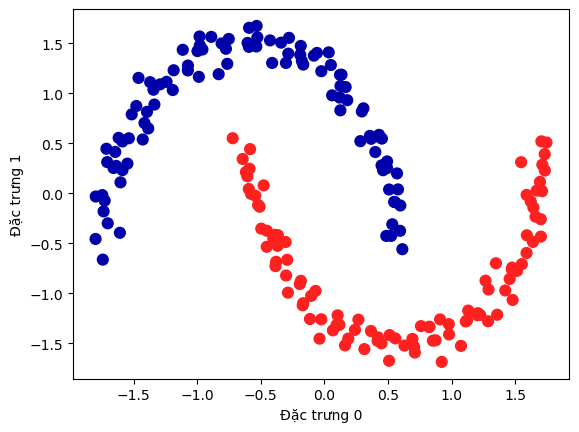

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# co giãn lại dữ liệu về trung bình 0 và phương sai đơn vị
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# vẽ các gán cụm
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Đặc trưng 0")
plt.ylabel("Đặc trưng 1")
plt.show()

**Hình 3-38. Gán cụm được tìm thấy bởi DBSCAN sử dụng giá trị mặc định của $eps=0.5$**

Vì thuật toán đã tạo ra số lượng cụm mong muốn (hai), các cài đặt tham số có vẻ hoạt động tốt. Nếu chúng ta giảm `eps` xuống 0.2 (từ mặc định là 0.5), chúng ta sẽ có tám cụm, rõ ràng là quá nhiều. Tăng `eps` lên 0.7 dẫn đến một cụm duy nhất.

Khi sử dụng DBSCAN, bạn cần cẩn thận về việc xử lý các gán cụm được trả về. Việc sử dụng -1 để chỉ nhiễu có thể dẫn đến các hiệu ứng không mong muốn khi sử dụng các nhãn cụm để lập chỉ mục cho một mảng khác.

### So sánh và Đánh giá các Thuật toán Phân cụm

Một trong những thách thức trong việc áp dụng các thuật toán phân cụm là rất khó để đánh giá một thuật toán đã hoạt động tốt như thế nào, và để so sánh kết quả giữa các thuật toán khác nhau. Sau khi nói về các thuật toán đằng sau k-means, phân cụm gộp, và DBSCAN, bây giờ chúng ta sẽ so sánh chúng trên một số tập dữ liệu thực tế.

#### Đánh giá phân cụm với sự thật ngầm định (ground truth)

Có các thước đo có thể được sử dụng để đánh giá kết quả của một thuật toán phân cụm so với một phân cụm sự thật ngầm định, những thước đo quan trọng nhất là chỉ số Rand điều chỉnh (ARI) và thông tin tương hỗ chuẩn hóa (NMI), cả hai đều cung cấp một thước đo định lượng từ 0 đến 1.

Ở đây, chúng ta so sánh các thuật toán k-means, phân cụm gộp, và DBSCAN bằng ARI. Chúng ta cũng bao gồm việc gán ngẫu nhiên các điểm vào hai cụm để so sánh (xem Hình 3-39):

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


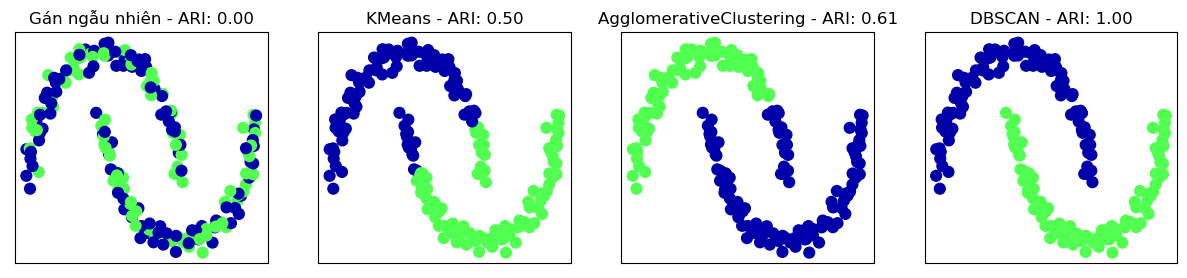

In [75]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering
import numpy as np

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# co giãn lại dữ liệu về trung bình 0 và phương sai đơn vị
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                       subplot_kw={'xticks': (), 'yticks': ()})

# tạo một danh sách các thuật toán để sử dụng
algorithms = [KMeans(n_clusters=2, n_init=10), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# tạo một gán cụm ngẫu nhiên để tham khảo
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# vẽ gán ngẫu nhiên
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Gán ngẫu nhiên - ARI: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # vẽ các gán cụm và tâm cụm
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                          adjusted_rand_score(y, clusters)))
plt.show()

**Hình 3-39. So sánh gán ngẫu nhiên, k-means, phân cụm gộp, và DBSCAN trên tập dữ liệu two_moons sử dụng điểm ARI có giám sát**

Chỉ số Rand điều chỉnh cung cấp kết quả trực quan, với việc gán cụm ngẫu nhiên có điểm là 0 và DBSCAN (khôi phục phân cụm mong muốn một cách hoàn hảo) có điểm là 1.

Một sai lầm phổ biến khi đánh giá phân cụm theo cách này là sử dụng `accuracy_score` thay vì `adjusted_rand_score`, `normalized_mutual_info_score`, hoặc một số thước đo phân cụm khác. Vấn đề trong việc sử dụng độ chính xác là nó yêu cầu các nhãn cụm được gán phải khớp chính xác với sự thật ngầm định. Tuy nhiên, các nhãn cụm tự chúng là vô nghĩa—điều duy nhất quan trọng là những điểm nào nằm trong cùng một cụm:

In [76]:
from sklearn.metrics import accuracy_score

# hai cách gán nhãn điểm này tương ứng với cùng một phân cụm
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# độ chính xác bằng không, vì không có nhãn nào giống nhau
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# chỉ số Rand điều chỉnh là 1, vì phân cụm hoàn toàn giống nhau
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


#### Đánh giá phân cụm không có sự thật ngầm định (ground truth)

Mặc dù chúng ta vừa chỉ ra một cách để đánh giá các thuật toán phân cụm, trong thực tế, có một vấn đề lớn với việc sử dụng các thước đo như ARI. Khi áp dụng các thuật toán phân cụm, thường không có sự thật ngầm định để so sánh kết quả. Nếu chúng ta biết phân cụm đúng của dữ liệu, chúng ta có thể sử dụng thông tin này để xây dựng một mô hình có giám sát như một bộ phân loại. Do đó, việc sử dụng các thước đo như ARI và NMI thường chỉ giúp ích trong việc phát triển thuật toán, chứ không phải trong việc đánh giá sự thành công trong một ứng dụng.

Có các thước đo chấm điểm cho phân cụm không yêu cầu sự thật ngầm định, như hệ số silhouette. Tuy nhiên, những thước đo này thường không hoạt động tốt trong thực tế. Điểm silhouette tính toán độ nhỏ gọn của một cụm, trong đó cao hơn là tốt hơn, với điểm hoàn hảo là 1. Mặc dù các cụm nhỏ gọn là tốt, độ nhỏ gọn không cho phép các hình dạng phức tạp. Dưới đây là một ví dụ so sánh kết quả của k-means, phân cụm gộp, và DBSCAN trên tập dữ liệu two_moons sử dụng điểm silhouette (Hình 3-40):

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


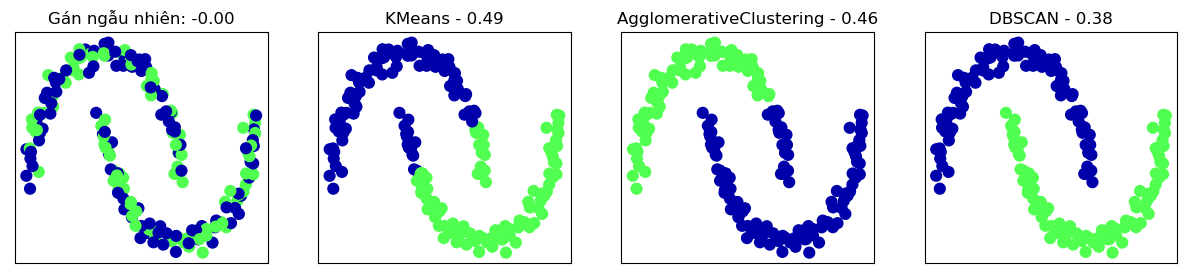

In [77]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# co giãn lại dữ liệu về trung bình 0 và phương sai đơn vị
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                       subplot_kw={'xticks': (), 'yticks': ()})

# tạo một gán cụm ngẫu nhiên để tham khảo
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# vẽ gán ngẫu nhiên
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Gán ngẫu nhiên: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2, n_init=10), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # vẽ các gán cụm và tâm cụm
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} - {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))
plt.show()

**Hình 3-40. So sánh gán ngẫu nhiên, k-means, phân cụm gộp, và DBSCAN trên tập dữ liệu two_moons sử dụng điểm silhouette không giám sát—kết quả trực quan hơn của DBSCAN có điểm silhouette thấp hơn so với các gán được tìm thấy bởi k-means**

Như bạn có thể thấy, k-means có điểm silhouette cao nhất, mặc dù chúng ta có thể thích kết quả được tạo ra bởi DBSCAN hơn. Một chiến lược tốt hơn một chút để đánh giá các cụm là sử dụng các thước đo phân cụm dựa trên độ bền vững. Các thước đo này chạy một thuật toán sau khi thêm một số nhiễu vào dữ liệu, hoặc sử dụng các cài đặt tham số khác nhau, và so sánh kết quả. Ý tưởng là nếu nhiều tham số thuật toán và nhiều nhiễu loạn của dữ liệu trả về cùng một kết quả, thì kết quả đó có khả năng đáng tin cậy. Thật không may, chiến lược này không được triển khai trong scikit-learn tại thời điểm viết bài.

Ngay cả khi chúng ta có được một phân cụm rất bền vững, hoặc một điểm silhouette rất cao, chúng ta vẫn không biết liệu có bất kỳ ý nghĩa ngữ nghĩa nào trong việc phân cụm, hoặc liệu việc phân cụm có phản ánh một khía cạnh nào đó của dữ liệu mà chúng ta quan tâm hay không. Hãy quay lại ví dụ về hình ảnh khuôn mặt. Chúng ta hy vọng tìm thấy các nhóm khuôn mặt tương tự—ví dụ, nam và nữ, người già và người trẻ, hoặc người có râu và không có râu. Giả sử chúng ta phân cụm dữ liệu thành hai cụm, và tất cả các thuật toán đều đồng ý về những điểm nào nên được phân cụm cùng nhau. Chúng ta vẫn không biết liệu các cụm được tìm thấy có tương ứng với bất kỳ khái niệm nào mà chúng ta quan tâm hay không. Có thể chúng đã tìm thấy các góc nhìn nghiêng so với các góc nhìn chính diện, hoặc các bức ảnh được chụp vào ban đêm so với các bức ảnh được chụp vào ban ngày, hoặc các bức ảnh được chụp bằng iPhone so với các bức ảnh được chụp bằng điện thoại Android. Cách duy nhất để biết liệu việc phân cụm có tương ứng với bất cứ điều gì chúng ta quan tâm hay không là phân tích các cụm một cách thủ công.

#### So sánh các thuật toán trên tập dữ liệu khuôn mặt

Hãy áp dụng các thuật toán k-means, DBSCAN, và phân cụm gộp cho tập dữ liệu Labeled Faces in the Wild, và xem liệu có thuật toán nào tìm thấy cấu trúc thú vị không. Chúng ta sẽ sử dụng biểu diễn eigenface của dữ liệu, được tạo ra bởi `PCA(whiten=True)`, với 100 thành phần:

In [78]:
# Tải dữ liệu và chuẩn bị
from sklearn.datasets import fetch_lfw_people
import numpy as np
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.
image_shape = people.images[0].shape

# Trích xuất eigenfaces từ dữ liệu lfw và biến đổi dữ liệu
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(X_people)
X_pca = pca.transform(X_people)

Chúng ta đã thấy trước đó rằng đây là một biểu diễn có ngữ nghĩa hơn của hình ảnh khuôn mặt so với các pixel thô. Nó cũng sẽ làm cho việc tính toán nhanh hơn. Một bài tập tốt cho bạn là chạy các thí nghiệm sau trên dữ liệu gốc, không có PCA, và xem bạn có tìm thấy các cụm tương tự không.

##### Phân tích tập dữ liệu khuôn mặt với DBSCAN
Chúng ta sẽ bắt đầu bằng cách áp dụng DBSCAN, mà chúng ta vừa thảo luận:

In [79]:
from sklearn.cluster import DBSCAN
# áp dụng DBSCAN với các tham số mặc định
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


Chúng ta thấy rằng tất cả các nhãn được trả về đều là -1, vì vậy tất cả dữ liệu đã được DBSCAN gán nhãn là "nhiễu". Có hai điều chúng ta có thể thay đổi để giúp giải quyết vấn đề này: chúng ta có thể làm cho `eps` cao hơn, để mở rộng vùng lân cận của mỗi điểm, và đặt `min_samples` thấp hơn, để xem xét các nhóm điểm nhỏ hơn là các cụm. Hãy thử thay đổi `min_samples` trước:

In [80]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


Ngay cả khi xem xét các nhóm ba điểm, mọi thứ vẫn được gán nhãn là nhiễu. Vì vậy, chúng ta cần tăng `eps`:

In [81]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


Sử dụng một `eps` lớn hơn nhiều là 15, chúng ta chỉ nhận được một cụm duy nhất và các điểm nhiễu. Chúng ta có thể sử dụng kết quả này để tìm hiểu xem "nhiễu" trông như thế nào so với phần còn lại của dữ liệu. Để hiểu rõ hơn về những gì đang xảy ra, hãy xem có bao nhiêu điểm là nhiễu, và bao nhiêu điểm nằm trong cụm:

In [82]:
# Đếm số điểm trong tất cả các cụm và nhiễu.
# bincount không cho phép số âm, vì vậy chúng ta cần cộng 1.
# Số đầu tiên trong kết quả tương ứng với các điểm nhiễu.
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  12 2051]


Có rất ít điểm nhiễu—chỉ 27—vì vậy chúng ta có thể xem tất cả chúng (xem Hình 3-41):

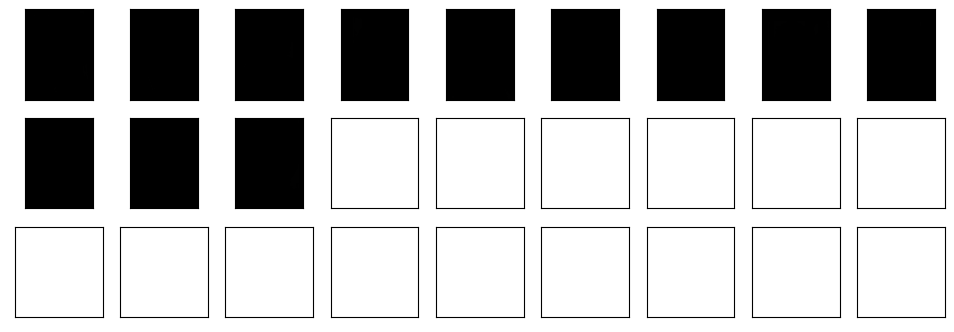

In [83]:
import matplotlib.pyplot as plt

noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                       figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1, cmap='gray')
plt.show()

**Hình 3-41. Các mẫu từ tập dữ liệu khuôn mặt được DBSCAN gán nhãn là nhiễu**

So sánh những hình ảnh này với mẫu ngẫu nhiên các hình ảnh khuôn mặt từ Hình 3-7, chúng ta có thể đoán tại sao chúng được gán nhãn là nhiễu: hình ảnh thứ năm ở hàng đầu tiên cho thấy một người đang uống từ một chiếc ly, có những hình ảnh của những người đội mũ, và trong hình ảnh cuối cùng có một bàn tay ở phía trước khuôn mặt của người đó. Các hình ảnh khác chứa các góc kỳ lạ hoặc các lần cắt quá gần hoặc quá rộng. Loại phân tích này—cố gắng tìm ra "người khác biệt"—được gọi là phát hiện ngoại lệ. Nếu đây là một ứng dụng thực tế, chúng ta có thể cố gắng làm tốt hơn việc cắt ảnh, để có được dữ liệu đồng nhất hơn. Có rất ít điều chúng ta có thể làm về việc mọi người trong ảnh đôi khi đội mũ, uống nước, hoặc cầm một cái gì đó trước mặt họ, nhưng tốt nhất là biết rằng đây là những vấn đề trong dữ liệu mà bất kỳ thuật toán nào chúng ta có thể áp dụng cần phải xử lý.

Nếu chúng ta muốn tìm các cụm thú vị hơn là chỉ một cụm lớn, chúng ta cần đặt `eps` nhỏ hơn, ở đâu đó giữa 15 và 0.5 (mặc định). Hãy xem các giá trị khác nhau của `eps` dẫn đến kết quả gì:

In [84]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("Clusters present: {}".format(np.unique(labels)))
    print("Cluster sizes: {}".format(np.bincount(labels + 1)))


eps=1
Clusters present: [-1]
Cluster sizes: [2063]

eps=3
Clusters present: [-1]
Cluster sizes: [2063]

eps=5
Clusters present: [-1  0]
Cluster sizes: [2060    3]

eps=7
Clusters present: [-1  0]
Cluster sizes: [1912  151]

eps=9
Clusters present: [-1  0]
Cluster sizes: [1302  761]

eps=11
Clusters present: [-1  0]
Cluster sizes: [ 512 1551]

eps=13
Clusters present: [-1  0]
Cluster sizes: [  96 1967]


Đối với các cài đặt `eps` thấp, tất cả các điểm được gán nhãn là nhiễu. Đối với `eps=7`, chúng ta có nhiều điểm nhiễu và nhiều cụm nhỏ hơn. Đối với `eps=9` chúng ta vẫn có nhiều điểm nhiễu, nhưng chúng ta có một cụm lớn và một số cụm nhỏ hơn. Bắt đầu từ `eps=11`, chúng ta chỉ có một cụm lớn và nhiễu. Điều thú vị cần lưu ý là không bao giờ có nhiều hơn một cụm lớn. Tối đa, có một cụm lớn chứa hầu hết các điểm, và một số cụm nhỏ hơn. Điều này chỉ ra rằng không có hai hoặc ba loại hình ảnh khuôn mặt khác nhau trong dữ liệu rất khác biệt, mà thay vào đó tất cả các hình ảnh đều ít nhiều giống nhau (hoặc không giống nhau) với phần còn lại.

Kết quả cho `eps=7` trông thú vị nhất, với nhiều cụm nhỏ. Chúng ta có thể điều tra phân cụm này chi tiết hơn bằng cách trực quan hóa tất cả các điểm trong mỗi cụm trong số 13 cụm nhỏ (Hình 3-42):

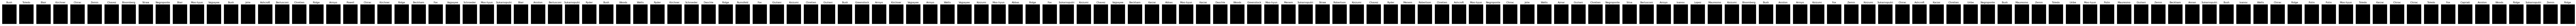

In [85]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                           subplot_kw={'xticks': (), 'yticks': ()})
    # Check if axes is iterable, if not, put it in a list
    axes_flat = axes.ravel() if isinstance(axes, np.ndarray) else [axes]
    for image, label, ax in zip(X_people[mask], y_people[mask], axes_flat):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1, cmap='gray')
        ax.set_title(people.target_names[label].split()[-1])
    # Hide unused subplots if n_images < number of subplots created
    for i in range(n_images, len(axes_flat)):
        axes_flat[i].set_visible(False)
    plt.show()

**Hình 3-42. Các cụm được tìm thấy bởi DBSCAN với $eps=7$**

Một số cụm tương ứng với những người có khuôn mặt rất khác biệt (trong tập dữ liệu này), chẳng hạn như Sharon hoặc Koizumi. Trong mỗi cụm, hướng của khuôn mặt cũng khá cố định, cũng như biểu cảm trên khuôn mặt. Một số cụm chứa khuôn mặt của nhiều người, nhưng họ có cùng hướng và biểu cảm tương tự. Điều này kết thúc phân tích của chúng ta về thuật toán DBSCAN được áp dụng cho tập dữ liệu khuôn mặt. Như bạn có thể thấy, chúng ta đang thực hiện một phân tích thủ công ở đây, khác với phương pháp tìm kiếm tự động hơn nhiều mà chúng ta có thể sử dụng cho học có giám sát dựa trên điểm $R^2$ hoặc độ chính xác. Hãy chuyển sang áp dụng k-means và phân cụm gộp.

##### Phân tích tập dữ liệu khuôn mặt với k-means
Chúng ta đã thấy rằng không thể tạo ra nhiều hơn một cụm lớn bằng DBSCAN. Phân cụm gộp và k-means có nhiều khả năng tạo ra các cụm có kích thước đồng đều hơn, nhưng chúng ta cần đặt một số lượng cụm mục tiêu. Chúng ta có thể đặt số lượng cụm thành số người đã biết trong tập dữ liệu, mặc dù rất khó có khả năng một thuật toán phân cụm không giám sát sẽ khôi phục chúng. Thay vào đó, chúng ta có thể bắt đầu với một số lượng cụm thấp, như 10, điều này có thể cho phép chúng ta phân tích từng cụm:

In [86]:
from sklearn.cluster import KMeans
# trích xuất các cụm với k-means
km = KMeans(n_clusters=10, random_state=0, n_init=10)
labels_km = km.fit_predict(X_pca)
print("Cluster sizes k-means: {}".format(np.bincount(labels_km)))

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Cluster sizes k-means: [ 94  91 270 222 119 331 119 220 495 102]


Như bạn có thể thấy, phân cụm k-means đã phân chia dữ liệu thành các cụm có kích thước tương đối tương tự từ 64 đến 386. Điều này khá khác với kết quả của DBSCAN.

Chúng ta có thể phân tích thêm kết quả của k-means bằng cách trực quan hóa các tâm cụm (Hình 3-43). Vì chúng ta đã phân cụm trong biểu diễn được tạo ra bởi PCA, chúng ta cần xoay các tâm cụm trở lại không gian ban đầu để trực quan hóa chúng, bằng cách sử dụng `pca.inverse_transform`:

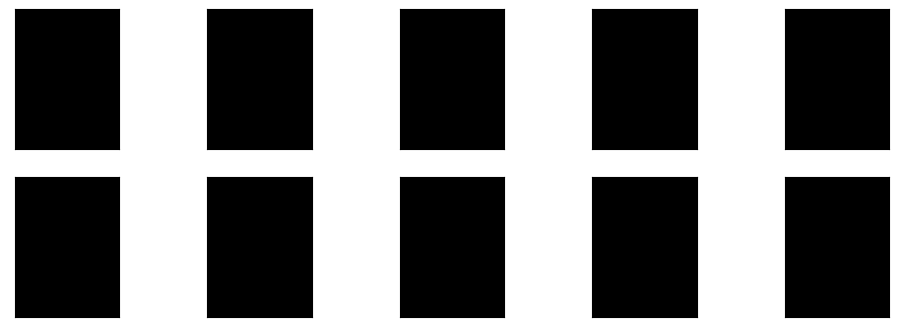

In [87]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                       figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1, cmap='gray')
plt.show()

**Hình 3-43. Các tâm cụm được tìm thấy bởi k-means khi đặt số lượng cụm là 10**

Các tâm cụm được tìm thấy bởi k-means là các phiên bản rất mịn của khuôn mặt. Điều này không có gì đáng ngạc nhiên, vì mỗi tâm là trung bình của 64 đến 386 hình ảnh khuôn mặt. Việc làm việc với một biểu diễn PCA đã giảm làm tăng thêm độ mịn của hình ảnh (so với các khuôn mặt được tái tạo bằng 100 chiều PCA trong Hình 3-11). Việc phân cụm dường như nhận ra các hướng khác nhau của khuôn mặt, các biểu cảm khác nhau (tâm cụm thứ ba dường như cho thấy một khuôn mặt đang cười), và sự hiện diện của cổ áo sơ mi (xem tâm cụm gần cuối). Để có cái nhìn chi tiết hơn, trong Hình 3-44, chúng ta hiển thị cho mỗi tâm cụm năm hình ảnh điển hình nhất trong cụm (các hình ảnh được gán cho cụm gần nhất với tâm cụm) và năm hình ảnh không điển hình nhất trong cụm (các hình ảnh được gán cho cụm xa nhất so với tâm cụm):

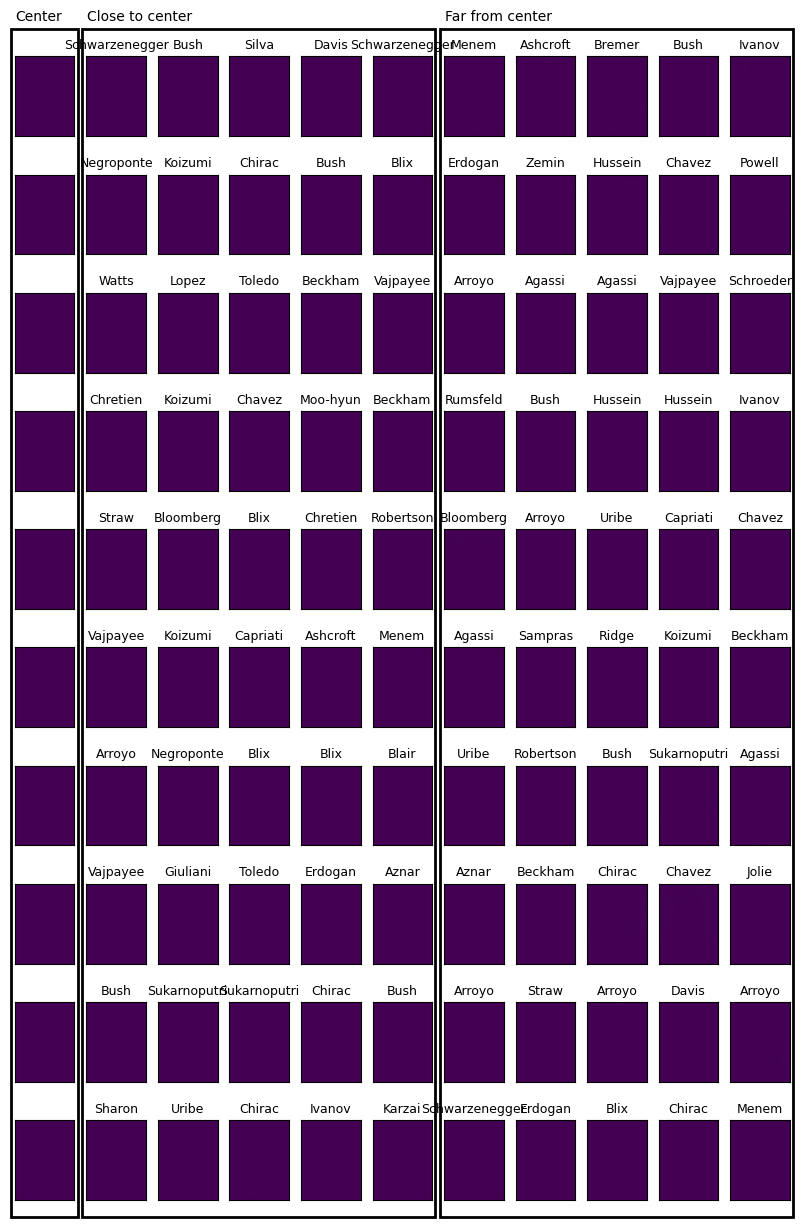

In [88]:
import mglearn
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

**Hình 3-44. Các hình ảnh mẫu cho mỗi cụm được tìm thấy bởi k-means—các tâm cụm ở bên trái, tiếp theo là năm điểm gần nhất với mỗi tâm và năm điểm được gán cho cụm nhưng ở xa tâm nhất**

Hình 3-44 xác nhận trực giác của chúng ta về các khuôn mặt cười cho cụm thứ ba, và cũng là tầm quan trọng của hướng cho các cụm khác. Tuy nhiên, các điểm "không điển hình" không quá giống với các tâm cụm, và việc gán của chúng có vẻ hơi tùy tiện. Điều này có thể được cho là do k-means phân vùng tất cả các điểm dữ liệu và không có khái niệm về các điểm "nhiễu", như DBSCAN. Sử dụng một số lượng cụm lớn hơn, thuật toán có thể tìm thấy các sự khác biệt tinh vi hơn. Tuy nhiên, việc thêm nhiều cụm hơn làm cho việc kiểm tra thủ công trở nên khó khăn hơn.

##### Phân tích tập dữ liệu khuôn mặt với phân cụm gộp
Bây giờ, hãy xem kết quả của phân cụm gộp:

In [89]:
from sklearn.cluster import AgglomerativeClustering
# trích xuất các cụm với phân cụm gộp ward
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(
    np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [185 975 298  96 103  28  60  22 203  93]


Phân cụm gộp cũng tạo ra các cụm có kích thước tương đối đồng đều, với kích thước cụm từ 26 đến 623. Các cụm này không đồng đều bằng các cụm được tạo ra bởi k-means, nhưng đồng đều hơn nhiều so với các cụm được tạo ra bởi DBSCAN. Chúng ta có thể tính ARI để đo xem hai phân vùng của dữ liệu được đưa ra bởi phân cụm gộp và k-means có tương tự nhau không:

In [90]:
from sklearn.metrics.cluster import adjusted_rand_score

print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.06


Một ARI chỉ 0.13 có nghĩa là hai cách gán nhãn cụm `labels_agg` và `labels_km` có ít điểm chung. Điều này không có gì đáng ngạc nhiên, vì các điểm ở xa các tâm cụm dường như có ít điểm chung đối với k-means. Tiếp theo, chúng ta có thể muốn vẽ biểu đồ cây (Hình 3-45). Chúng ta sẽ giới hạn độ sâu của cây trong biểu đồ, vì việc phân nhánh xuống từng điểm dữ liệu trong số 2.063 điểm sẽ dẫn đến một biểu đồ dày đặc không thể đọc được:

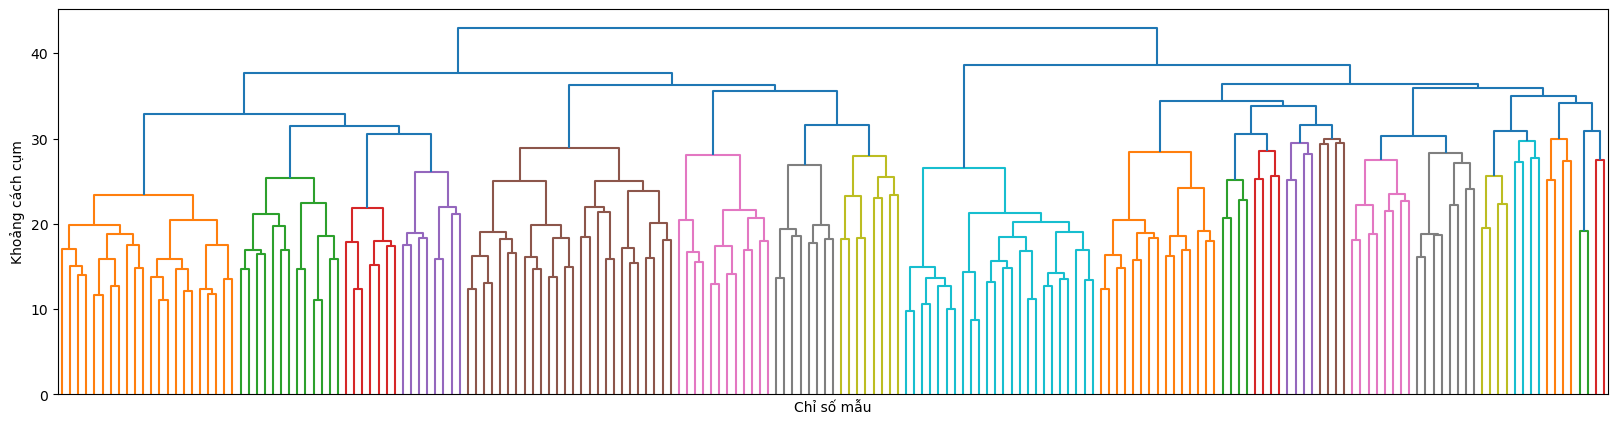

In [91]:
from scipy.cluster.hierarchy import dendrogram, ward

linkage_array = ward(X_pca)
# bây giờ chúng ta vẽ biểu đồ cây cho linkage_array
# chứa các khoảng cách giữa các cụm
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Chỉ số mẫu")
plt.ylabel("Khoảng cách cụm")
plt.show()

**Hình 3-45. Biểu đồ cây của phân cụm gộp trên tập dữ liệu khuôn mặt**

Tạo 10 cụm, chúng ta cắt ngang cây ở trên cùng, nơi có 10 đường thẳng đứng. Trong biểu đồ cây cho dữ liệu đồ chơi được hiển thị trong Hình 3-36, bạn có thể thấy qua độ dài của các nhánh rằng hai hoặc ba cụm có thể nắm bắt dữ liệu một cách thích hợp. Đối với dữ liệu khuôn mặt, dường như không có một điểm cắt tự nhiên nào. Có một số nhánh đại diện cho các nhóm khác biệt hơn, nhưng dường như không có một số lượng cụm cụ thể nào là phù hợp. Điều này không có gì đáng ngạc nhiên, với kết quả của DBSCAN, đã cố gắng phân cụm tất cả các điểm lại với nhau. Hãy trực quan hóa 10 cụm, như chúng ta đã làm cho k-means trước đó (Hình 3-46). Lưu ý rằng không có khái niệm về tâm cụm trong phân cụm gộp (mặc dù chúng ta có thể tính giá trị trung bình), và chúng ta chỉ đơn giản hiển thị một vài điểm đầu tiên trong mỗi cụm. Chúng ta hiển thị số lượng điểm trong mỗi cụm ở bên trái của hình ảnh đầu tiên:

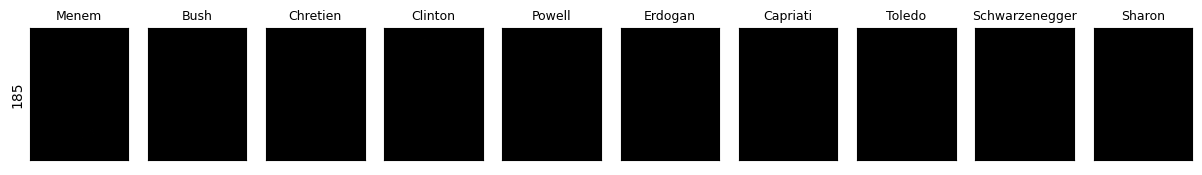

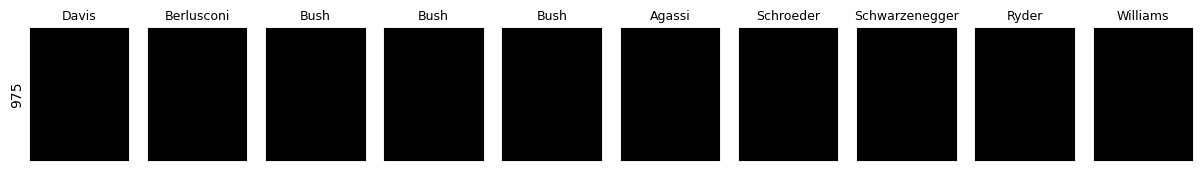

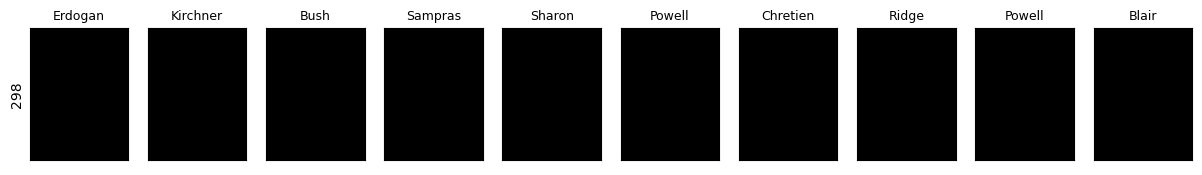

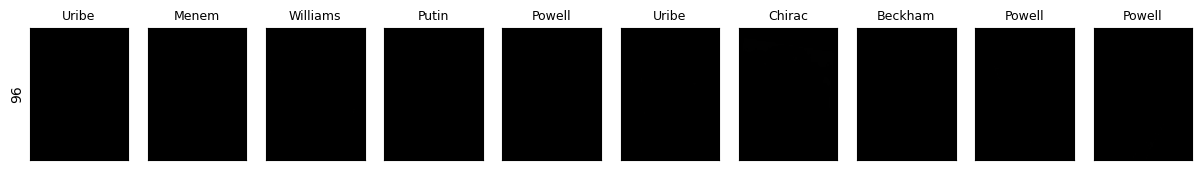

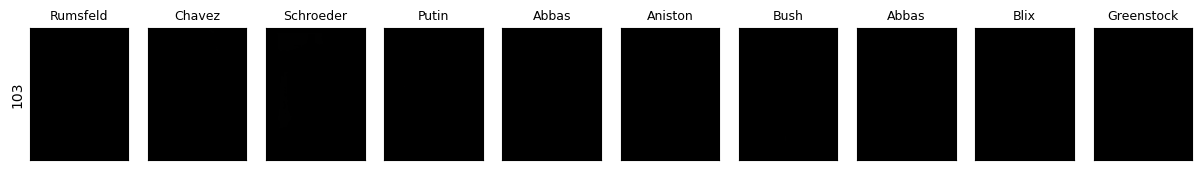

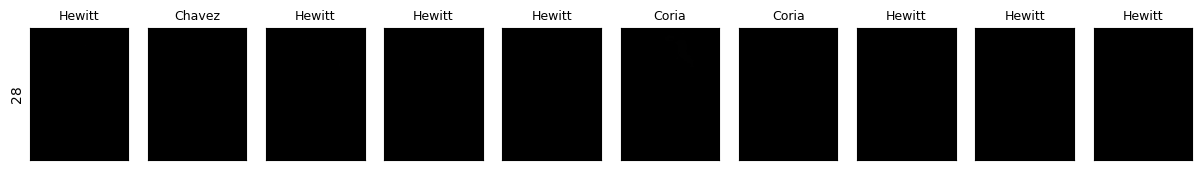

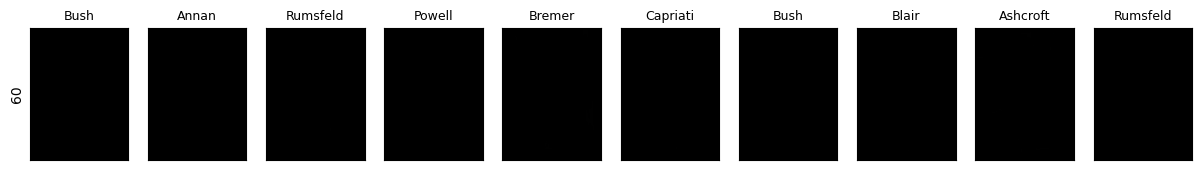

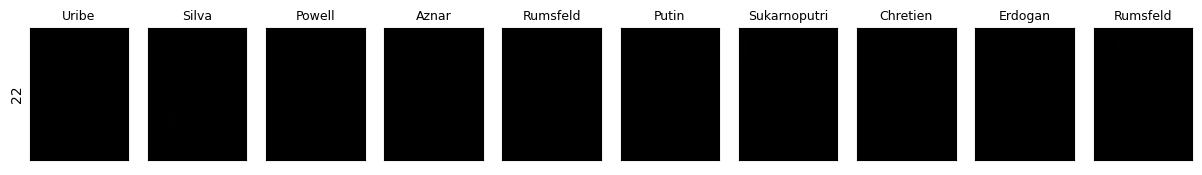

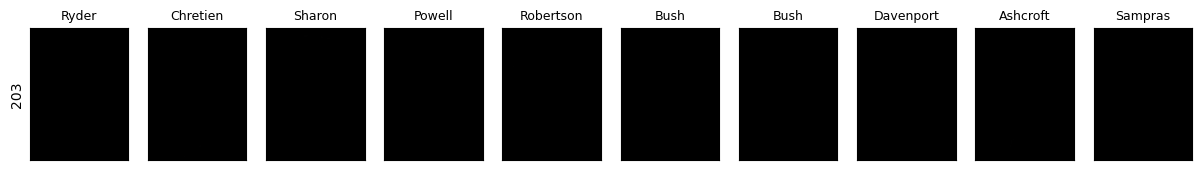

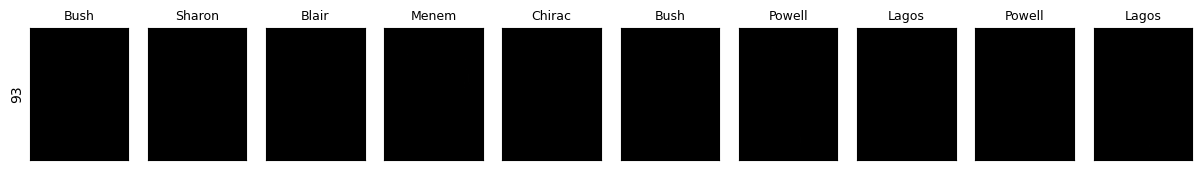

In [92]:
# This visualization might be large and take time to render.
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                           figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    # Limit the number of images to plot to 10 for each cluster
    images_to_plot = X_people[mask][:10]
    labels_to_plot = y_people[mask][:10]
    for i in range(10):
        if i < len(images_to_plot):
            axes[i].imshow(images_to_plot[i].reshape(image_shape), vmin=0, vmax=1, cmap='gray')
            axes[i].set_title(people.target_names[labels_to_plot[i]].split()[-1],
                            fontdict={'fontsize': 9})
        else:
            axes[i].set_visible(False) # Hide unused subplots
    plt.show()

**Hình 3-46. Các hình ảnh ngẫu nhiên từ các cụm được tạo ra bởi phân cụm gộp—mỗi hàng tương ứng với một cụm; số ở bên trái liệt kê số lượng hình ảnh trong mỗi cụm**

Trong khi một số cụm dường như có một chủ đề ngữ nghĩa, nhiều cụm trong số chúng quá lớn để thực sự đồng nhất. Để có được các cụm đồng nhất hơn, chúng ta có thể chạy lại thuật toán, lần này với 40 cụm, và chọn ra một số cụm đặc biệt thú vị (Hình 3-47):

cluster sizes agglomerative clustering: [ 45 183  41  89 162  28  22  31  54 216  28  97 156  35  36  32  62  30
  42  16  55  29  33  63  16  31  18  31  64  60  30  29   6  36   7  27
  47  22  43  11]


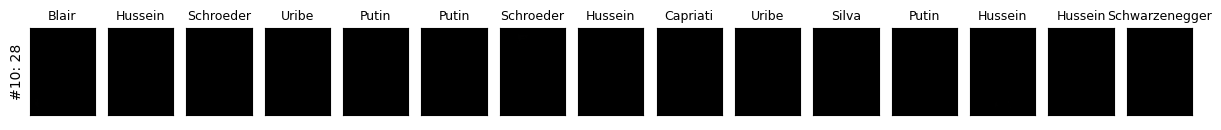

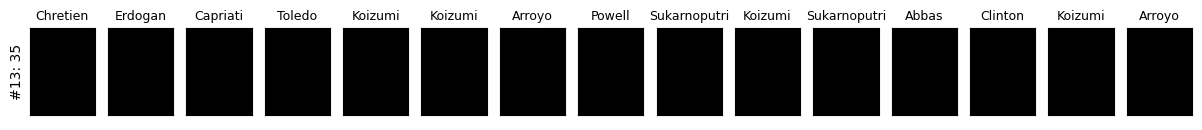

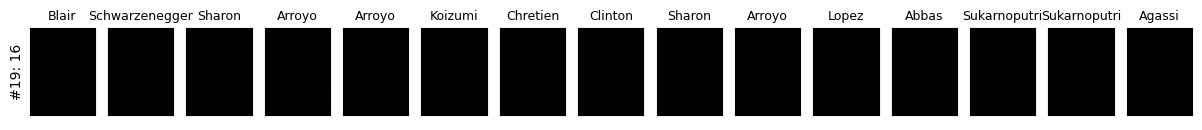

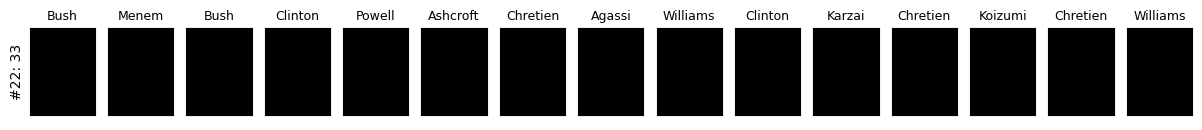

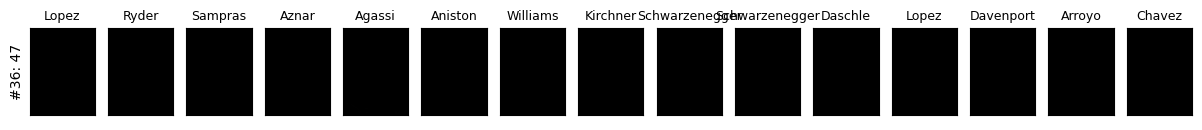

In [93]:
# trích xuất các cụm với phân cụm gộp ward
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

# Plotting hand-picked interesting clusters
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # các cụm "thú vị" được chọn thủ công
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                           figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    
    images_to_plot = X_people[mask][:15]
    labels_to_plot = y_people[mask][:15]
    
    for i in range(15):
        if i < len(images_to_plot):
            axes[i].imshow(images_to_plot[i].reshape(image_shape), vmin=0, vmax=1, cmap='gray')
            axes[i].set_title(people.target_names[labels_to_plot[i]].split()[-1],
                            fontdict={'fontsize': 9})
        else:
            axes[i].set_visible(False)
    plt.show()

**Hình 3-47. Các hình ảnh từ các cụm được chọn được tìm thấy bởi phân cụm gộp khi đặt số lượng cụm là 40—văn bản ở bên trái hiển thị chỉ số của cụm và tổng số điểm trong cụm**

Ở đây, việc phân cụm dường như đã nhận ra "da ngăm và cười", "áo sơ mi có cổ", "người phụ nữ đang cười", "Hussein", và "trán cao". Chúng ta cũng có thể tìm thấy các cụm rất giống nhau này bằng cách sử dụng biểu đồ cây, nếu chúng ta phân tích chi tiết hơn.

### Tóm tắt các Phương pháp Phân cụm

Phần này đã cho thấy rằng việc áp dụng và đánh giá phân cụm là một quy trình định tính cao, và thường hữu ích nhất trong giai đoạn khám phá của phân tích dữ liệu. Chúng ta đã xem xét ba thuật toán phân cụm: k-means, DBSCAN, và phân cụm gộp. Cả ba đều có một cách để kiểm soát độ chi tiết của phân cụm. k-means và phân cụm gộp cho phép bạn chỉ định số lượng cụm mong muốn, trong khi DBSCAN cho phép bạn xác định sự gần gũi bằng cách sử dụng tham số `eps`, gián tiếp ảnh hưởng đến kích thước cụm. Cả ba phương pháp đều có thể được sử dụng trên các tập dữ liệu thực tế lớn, tương đối dễ hiểu, và cho phép phân cụm thành nhiều cụm.

Mỗi thuật toán có những điểm mạnh hơi khác nhau. k-means cho phép mô tả các cụm bằng cách sử dụng các trung bình của cụm. Nó cũng có thể được xem như một phương pháp phân rã, trong đó mỗi điểm dữ liệu được biểu diễn bằng tâm cụm của nó. DBSCAN cho phép phát hiện các "điểm nhiễu" không được gán cho bất kỳ cụm nào, và nó có thể giúp tự động xác định số lượng cụm. Trái ngược với hai phương pháp kia, nó cho phép các hình dạng cụm phức tạp, như chúng ta đã thấy trong ví dụ `two_moons`. DBSCAN đôi khi tạo ra các cụm có kích thước rất khác nhau, có thể là một điểm mạnh hoặc một điểm yếu. Phân cụm gộp có thể cung cấp toàn bộ hệ thống phân cấp các phân vùng có thể có của dữ liệu, có thể được kiểm tra dễ dàng thông qua các biểu đồ cây.

## Tóm tắt và Triển vọng

Chương này đã giới thiệu một loạt các thuật toán học không giám sát có thể được áp dụng cho phân tích dữ liệu khám phá và tiền xử lý. Việc có biểu diễn đúng của dữ liệu thường rất quan trọng để học có giám sát hoặc không giám sát thành công, và các phương pháp tiền xử lý và phân rã đóng một vai trò quan trọng trong việc chuẩn bị dữ liệu.

Phân rã, học đa tạp, và phân cụm là những công cụ thiết yếu để hiểu sâu hơn về dữ liệu của bạn, và có thể là cách duy nhất để hiểu được dữ liệu của bạn khi không có thông tin giám sát. Ngay cả trong một môi trường có giám sát, các công cụ khám phá cũng quan trọng để hiểu rõ hơn về các thuộc tính của dữ liệu. Thường thì rất khó để định lượng tính hữu dụng của một thuật toán không giám sát, mặc dù điều này không nên ngăn cản bạn sử dụng chúng để thu thập thông tin chi tiết từ dữ liệu của bạn.

Với những phương pháp này trong tay, bây giờ bạn đã được trang bị tất cả các thuật toán học thiết yếu mà các nhà thực hành học máy sử dụng hàng ngày. Chúng tôi khuyến khích bạn thử các phương pháp phân cụm và phân rã trên cả dữ liệu đồ chơi hai chiều và trên các tập dữ liệu thực tế được bao gồm trong scikit-learn, như các tập dữ liệu digits, iris, và cancer.

### Tóm tắt Giao diện Estimator
Hãy xem lại ngắn gọn API mà chúng ta đã giới thiệu trong Chương 2 và 3. Tất cả các thuật toán trong scikit-learn, dù là tiền xử lý, học có giám sát, hay thuật toán học không giám sát, đều được triển khai dưới dạng các lớp. Các lớp này được gọi là các estimator trong scikit-learn. Để áp dụng một thuật toán, trước tiên bạn phải khởi tạo một đối tượng của lớp cụ thể đó:


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Lớp estimator chứa thuật toán, và cũng lưu trữ mô hình được học từ dữ liệu bằng thuật toán đó. Bạn nên đặt bất kỳ tham số nào của mô hình khi xây dựng đối tượng mô hình. Các tham số này bao gồm điều chuẩn, kiểm soát độ phức tạp, số lượng cụm cần tìm, v.v. Tất cả các estimator đều có một phương thức `fit`, được sử dụng để xây dựng mô hình. Phương thức `fit` luôn yêu cầu đối số đầu tiên của nó là dữ liệu `X`, được biểu diễn dưới dạng một mảng NumPy hoặc một ma trận thưa SciPy, trong đó mỗi hàng đại diện cho một điểm dữ liệu duy nhất. Dữ liệu `X` luôn được giả định là một mảng NumPy hoặc ma trận thưa SciPy có các mục nhập liên tục (số thực dấu phẩy động).

Các thuật toán có giám sát cũng yêu cầu một đối số `y`, là một mảng NumPy một chiều chứa các giá trị mục tiêu cho hồi quy hoặc phân loại (tức là, các nhãn hoặc phản hồi đầu ra đã biết).

Có hai cách chính để áp dụng một mô hình đã học trong scikit-learn. Để tạo một dự đoán dưới dạng một đầu ra mới như `y`, bạn sử dụng phương thức `predict`. Để tạo một biểu diễn mới của dữ liệu đầu vào `X`, bạn sử dụng phương thức `transform`. Bảng 3-1 tóm tắt các trường hợp sử dụng của các phương thức `predict` và `transform`.

**Bảng 3-1. Tóm tắt API scikit-learn**

| | `estimator.fit(X_train, [y_train])` | `estimator.predict(X_test)` | `estimator.transform(X_test)` |
| :--- | :--- | :--- | :--- |
| **Phân loại** | Xây dựng mô hình | Dự đoán nhãn lớp | | 
| **Hồi quy** | Xây dựng mô hình | Dự đoán giá trị mục tiêu | | 
| **Phân cụm** | Xây dựng mô hình | Dự đoán nhãn cụm | Khoảng cách đến tâm cụm | 
| **Tiền xử lý** | Tìm tham số | | Áp dụng biến đổi | 
| **Giảm chiều** | Tìm tham số | | Giảm chiều | 
| **Trích xuất Đặc trưng** | Tìm tham số | | Trích xuất đặc trưng | 

Ngoài ra, tất cả các mô hình có giám sát đều có một phương thức `score(X_test, y_test)` cho phép đánh giá mô hình. Trong Bảng 3-1, `X_train` và `y_train` đề cập đến dữ liệu huấn luyện và nhãn huấn luyện, trong khi `X_test` và `y_test` đề cập đến dữ liệu kiểm tra và nhãn kiểm tra (nếu có).